# **Exploratory Data Analysis on Global Terrorism between 1970 and 2017**
### This project involves an Exploratory Data Analysis (EDA) on Global Terrorism data spanning from 1970 to 2017. The analysis aims to uncover patterns and trends in terrorism incidents worldwide, providing insights into various aspects such as temporal trends, geographical hotspots, attack characteristics, target information, and more.

## Date: June 2024.

## Author: Jacob O. Jaroya


## 1. Load the Dataset

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import warnings
from wordcloud import WordCloud

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load data
terrsm_data = pd.read_csv('/content/drive/MyDrive/Global_Terrorism_Data/global_terrorism_data.csv', encoding='ISO-8859-1', low_memory=False)

In [4]:
# Display the first few rows of the dataset
terrsm_data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [5]:
# Get the number of rows and columns
num_rows, num_cols = terrsm_data.shape
print(f'The dataset has {num_rows} rows and {num_cols} columns.')

The dataset has 181691 rows and 135 columns.


## 2. Data Cleaning
Check for missing values and data types and clean the data accordingly.

In [6]:
# Check for missing values
missing_values = terrsm_data.isnull().sum()
missing_values

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
column_headings = terrsm_data.columns.tolist()
column_headings

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

### Meta Data for the Dataset
1.	eventid: Unique identifier for each event.
2.	iyear: Year in which the incident occurred.
3.	imonth: Month in which the incident occurred.
4.	iday: Day of the month on which the incident occurred.
5.	approxdate: Approximate date of the incident, if the exact date is unknown.
6.	extended: Indicates if the incident lasted more than 24 hours (1 = Yes, 0 = No).
7.	resolution: The date when the extended incident was resolved.
8.	country: Numeric code for the country in which the incident occurred.
9.	country_txt: Full name of the country in which the incident occurred.
10.	region: Numeric code for the region in which the incident occurred.
11.	region_txt: Full name of the region in which the incident occurred.
12.	provstate: Name of the province, state, or administrative region in which the incident occurred.
13.	city: Name of the city in which the incident occurred.
14.	latitude: Latitude coordinate of the incident location.
15.	longitude: Longitude coordinate of the incident location.
16.	specificity: Measure of the specificity of the location (1 = city, 2 = vicinity, 3 = multiple cities, etc.).
17.	vicinity: Indicates if the incident occurred in the immediate vicinity of the city (1 = Yes, 0 = No).
18.	location: Additional information about the location of the incident.
19.	summary: Summary of the incident.
20.	crit1: Indicates if the incident meets criterion 1 of the GTD definition of terrorism (1 = Yes, 0 = No).
21.	crit2: Indicates if the incident meets criterion 2 of the GTD definition of terrorism (1 = Yes, 0 = No).
22.	crit3: Indicates if the incident meets criterion 3 of the GTD definition of terrorism (1 = Yes, 0 = No).
23.	doubtterr: Indicates if there is doubt about whether the incident is an act of terrorism (1 = Yes, 0 = No).
24.	alternative: Alternative designation of the incident (if not considered terrorism).
25.	alternative_txt: Description of the alternative designation.
26.	multiple: Indicates if the incident is part of a multiple incident (1 = Yes, 0 = No).
27.	success: Indicates if the incident was successful (1 = Yes, 0 = No).
28.	suicide: Indicates if the incident was a suicide attack (1 = Yes, 0 = No).
29.	attacktype1: Numeric code for the primary attack type.
30.	attacktype1_txt: Full name of the primary attack type.
31.	attacktype2: Numeric code for the secondary attack type (if applicable).
32.	attacktype2_txt: Full name of the secondary attack type (if applicable).
33.	attacktype3: Numeric code for the tertiary attack type (if applicable).
34.	attacktype3_txt: Full name of the tertiary attack type (if applicable).
35.	targtype1: Numeric code for the primary target type.
36.	targtype1_txt: Full name of the primary target type.
37.	targsubtype1: Numeric code for the primary target subtype (if applicable).
38.	targsubtype1_txt: Full name of the primary target subtype (if applicable).
39.	corp1: Name of the target entity (e.g., organization, corporation).
40.	target1: Description of the specific target.
41.	natlty1: Numeric code for the nationality of the target.
42.	natlty1_txt: Full name of the nationality of the target.
43.	targtype2: Numeric code for the secondary target type (if applicable).
44.	targtype2_txt: Full name of the secondary target type (if applicable).
45.	targsubtype2: Numeric code for the secondary target subtype (if applicable).
46.	targsubtype2_txt: Full name of the secondary target subtype (if applicable).
47.	corp2: Name of the secondary target entity (if applicable).
48.	target2: Description of the secondary target (if applicable).
49.	natlty2: Numeric code for the nationality of the secondary target (if applicable).
50.	natlty2_txt: Full name of the nationality of the secondary target (if applicable).
51.	targtype3: Numeric code for the tertiary target type (if applicable).
52.	targtype3_txt: Full name of the tertiary target type (if applicable).
53.	targsubtype3: Numeric code for the tertiary target subtype (if applicable).
54.	targsubtype3_txt: Full name of the tertiary target subtype (if applicable).
55.	corp3: Name of the tertiary target entity (if applicable).
56.	target3: Description of the tertiary target (if applicable).
57.	natlty3: Numeric code for the nationality of the tertiary target (if applicable).
58.	natlty3_txt: Full name of the nationality of the tertiary target (if applicable).
59.	gname: Name of the perpetrator group.
60.	gsubname: Name of the sub-group of the perpetrator group (if applicable).
61.	gname2: Name of the second perpetrator group (if applicable).
62.	gsubname2: Name of the sub-group of the second perpetrator group (if applicable).
63.	gname3: Name of the third perpetrator group (if applicable).
64.	gsubname3: Name of the sub-group of the third perpetrator group (if applicable).
65.	motive: Motive of the attack.
66.	guncertain1: Indicates if there is uncertainty about the involvement of the first perpetrator group (1 = Yes, 0 = No).
67.	guncertain2: Indicates if there is uncertainty about the involvement of the second perpetrator group (1 = Yes, 0 = No).
68.	guncertain3: Indicates if there is uncertainty about the involvement of the third perpetrator group (1 = Yes, 0 = No).
69.	individual: Indicates if the attack was carried out by an individual (1 = Yes, 0 = No).
70.	nperps: Number of perpetrators.
71.	nperpcap: Number of perpetrators captured.
72.	claimed: Indicates if the attack was claimed by a group or individual (1 = Yes, 0 = No).
73.	claimmode: Numeric code for the mode of the claim.
74.	claimmode_txt: Full name of the mode of the claim.
75.	claim2: Indicates if the attack was claimed by a second group or individual (1 = Yes, 0 = No).
76.	claimmode2: Numeric code for the mode of the second claim (if applicable).
77.	claimmode2_txt: Full name of the mode of the second claim (if applicable).
78.	claim3: Indicates if the attack was claimed by a third group or individual (1 = Yes, 0 = No).
79.	claimmode3: Numeric code for the mode of the third claim (if applicable).
80.	claimmode3_txt: Full name of the mode of the third claim (if applicable).
81.	compclaim: Indicates if the attack was claimed in a competing claim (1 = Yes, 0 = No).
82.	weaptype1: Numeric code for the primary weapon type.
83.	weaptype1_txt: Full name of the primary weapon type.
84.	weapsubtype1: Numeric code for the primary weapon subtype (if applicable).
85.	weapsubtype1_txt: Full name of the primary weapon subtype (if applicable).
86.	weaptype2: Numeric code for the secondary weapon type (if applicable).
87.	weaptype2_txt: Full name of the secondary weapon type (if applicable).
88.	weapsubtype2: Numeric code for the secondary weapon subtype (if applicable).
89.	weapsubtype2_txt: Full name of the secondary weapon subtype (if applicable).
90.	weaptype3: Numeric code for the tertiary weapon type (if applicable).
91.	weaptype3_txt: Full name of the tertiary weapon type (if applicable).
92.	weapsubtype3: Numeric code for the tertiary weapon subtype (if applicable).
93.	weapsubtype3_txt: Full name of the tertiary weapon subtype (if applicable).
94.	weaptype4: Numeric code for the quaternary weapon type (if applicable).
95.	weaptype4_txt: Full name of the quaternary weapon type (if applicable).
96.	weapsubtype4: Numeric code for the quaternary weapon subtype (if applicable).
97.	weapsubtype4_txt: Full name of the quaternary weapon subtype (if applicable).
98.	weapdetail: Detailed description of the weapon used.
99.	nkill: Total number of confirmed fatalities for the incident.
100.	nkillus: Number of U.S. nationals killed in the incident.
101.	nkillter: Number of perpetrators killed in the incident.
102.	nwound: Total number of confirmed non-fatal injuries for the incident.
103.	nwoundus: Number of U.S. nationals wounded in the incident.
104.	nwoundte: Number of perpetrators wounded in the incident.
105.	property: Indicates if the incident involved property damage (1 = Yes, 0 = No).
106.	propextent: Numeric code for the extent of property damage.
107.	propextent_txt: Full name of the extent of property damage.
108.	propvalue: Estimated value of property damage (in USD).
109.	propcomment: Additional comments on property damage.
110.	ishostkid: Indicates if the incident involved a hostage or kidnapping (1 = Yes, 0 = No).
111.	nhostkid: Number of hostages or kidnapping victims.
112.	nhostkidus: Number of U.S. nationals taken hostage or kidnapped.
113.	nhours: Number of hours the hostages were held.
114.	ndays: Number of days the hostages were held.
115.	divert: Description of the diversion if the incident involved a hijacking.
116.	kidhijcountry: Country in which the hijacking or kidnapping occurred.
117.	ransom: Indicates if a ransom was demanded (1 = Yes, 0 = No).
118.	ransomamt: Amount of ransom demanded (in USD).
119.	ransomamtus: Amount of ransom demanded in USD from U.S. entities.
120.	ransompaid: Amount of ransom paid (in USD).
121.	ransompaidus: Amount of ransom paid in USD by U.S. entities.
122.	ransomnote: Details of the ransom note, if any.
123.	hostkidoutcome: Numeric code for the outcome of the hostage or kidnapping event.
124.	hostkidoutcome_txt: Full description of the outcome of the hostage or kidnapping event.
125.	nreleased: Number of hostages released or escaped.
126.	addnotes: Additional notes about the incident.
127.	scite1: Source citation for the incident.
128.	scite2: Secondary source citation for the incident.
129.	scite3: Tertiary source citation for the incident.
130.	dbsource: Database source from which the incident information was derived.
131.	INT_LOG: Indicates if the incident is logged in the International Terrorism Attributes of Terrorist Events (ITERATE) database (1 = Yes, 0 = No).
132.	INT_IDEO: Indicates if the incident is ideologically motivated according to the ITERATE database (1 = Yes, 0 = No).
133.	INT_MISC: Indicates if the incident is miscellaneous according to the ITERATE database (1 = Yes, 0 = No).
134.	INT_ANY: Indicates if the incident is included in any of the ITERATE categories (1 = Yes, 0 = No).
135.	related: Incident identifiers of related incidents.

### Remove duplicates
    - Remove any duplicate rows

In [8]:
# Identify and remove any duplicate rows
terrsm_data.drop_duplicates(inplace=True)

In [9]:
terrsm_data.shape

(181691, 135)

### Handling missing values
    (i) Critical attributes: "iyear", "imonth", "iday", "country", "region", "attacktype1_txt" and "gname" are not missing
    (ii) Less critical attributes: impute or fill if necessary

In [10]:
# Handling missing values in Critical attributes if any
critical_columns = ["iyear", "imonth", "iday", "country", "region", "attacktype1_txt", "gname"]
terrsm_data.dropna(subset=critical_columns,inplace=True)

In [11]:
# Handling missing values in longitude and latiyude attributes if any
long_lat = ["longitude", "latitude"]
terrsm_data.dropna(subset=long_lat,inplace=True)

In [12]:
terrsm_data.shape

(177134, 135)

### Filter by validation
    (i) Invalid dates: Remove rows with invalid dates (e.g., imonth>12 or iday>31)
    (ii) Uncertain Incidents: Rows where "doubtterr"is 1 (indicating doubt about whether the incident is terrorisn) might be considered for removal or separate analysis.

In [13]:
# Filter Invalid dates
terrsm_data = terrsm_data[(terrsm_data['imonth']<=12) & (terrsm_data['iday']<=31)]

### Remove Rows with Doubtful Terrorism Classification
    Irrelevant Data: Remove rows where 'doubtterr'= 1, indicating doubt if the act was terrorism

In [14]:
# Remove rows where 'doubtterr'= 1, indicating doubt if the act was terrorism
terrsm_data = terrsm_data[terrsm_data['doubtterr']!=1]

In [15]:
terrsm_data.shape

(149283, 135)

In [16]:
# Remove Non-Terrorism Incidents
terrsm_data = terrsm_data[~((terrsm_data['crit1']==0) & (terrsm_data['crit2']==0) & (terrsm_data['crit3']==0))]

In [17]:
terrsm_data.shape

(149283, 135)

### Standardize Text Fields
    Use techniques like str.lower() and str.strip() to ensure consistency in text fields.

In [18]:
# Ensure consistency in text fields.
terrsm_data['country_txt'] = terrsm_data['country_txt'].str.lower().str.strip()
terrsm_data['region_txt'] = terrsm_data['region_txt'].str.lower().str.strip()
terrsm_data['attacktype1_txt'] = terrsm_data['attacktype1_txt'].str.lower().str.strip()
terrsm_data['targtype1_txt'] = terrsm_data['targtype1_txt'].str.lower().str.strip()
terrsm_data['targsubtype1_txt'] = terrsm_data['targsubtype1_txt'].str.lower().str.strip()
terrsm_data['target1'] = terrsm_data['target1'].str.lower().str.strip()
terrsm_data['gname'] = terrsm_data['gname'].str.lower().str.strip()
terrsm_data['weaptype1_txt'] = terrsm_data['weaptype1_txt'].str.lower().str.strip()

# **EDA**

## **(A) Temporal Attributes**
    (i) Year: Analyze trends over time to understand how terrorism has evolved
    (ii) Month: Examine seasonal patterns in terrorist activities.
    (iii) Look for specific days with highest incidents.

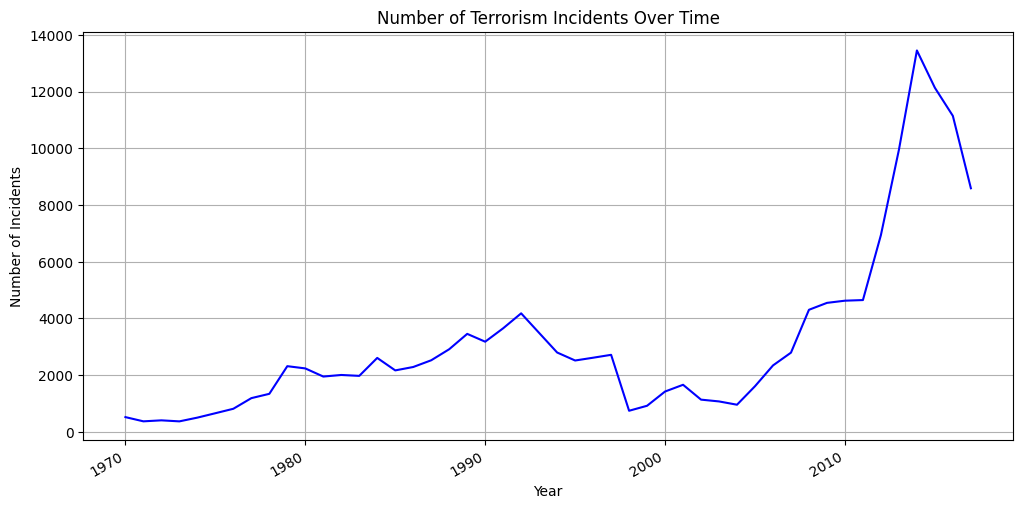

In [19]:
# Analyze trends over time to understand how terrorism has evolved

# Convert 'iyear' to datetime format
terrsm_data['iyear'] = pd.to_datetime(terrsm_data['iyear'], format='%Y')

# Group by year and count the number of incidents
yearly_counts = terrsm_data.groupby('iyear').size()

# Plotting
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', color='blue')
plt.title('Number of Terrorism Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

The graph indicates that there has been fluctuation in the number of terrorism incidents over the years. There appears to be a general increasing trend from the earlier years to a peak around 2014, followed by a gradual decrease in the number of incidents in recent years.

This trend suggests that terrorism activities have varied over time, with periods of higher and lower activity. Further analysis would be needed to understand the factors contributing to these trends and whether there are any patterns or specific reasons behind the fluctuations observed in the data.

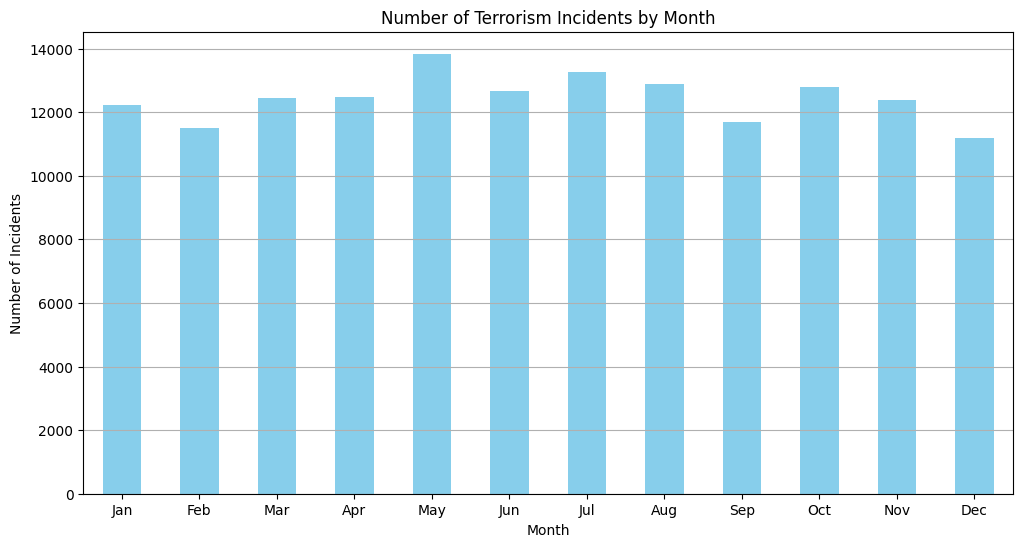

In [20]:
# Month: Examine seasonal patterns in terrorist activities.

# Convert 'imonth' to datetime format, ignoring errors
terrsm_data['imonth'] = pd.to_datetime(terrsm_data['imonth'], format='%m', errors='coerce')

# Group by month and count the number of incidents
monthly_counts = terrsm_data.groupby('imonth').size().fillna(0)  # Fill NaN values with 0 for plotting

# Plotting
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Terrorism Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y')
plt.show()

Based on the plot showing the number of terrorism incidents by month, it appears that there is some variation in the number of incidents across different months. The months of **May, June, July, and August** seem to have higher numbers of incidents compared to other months, suggesting a possible seasonal pattern. However, further analysis would be needed to confirm this pattern and understand its underlying causes.

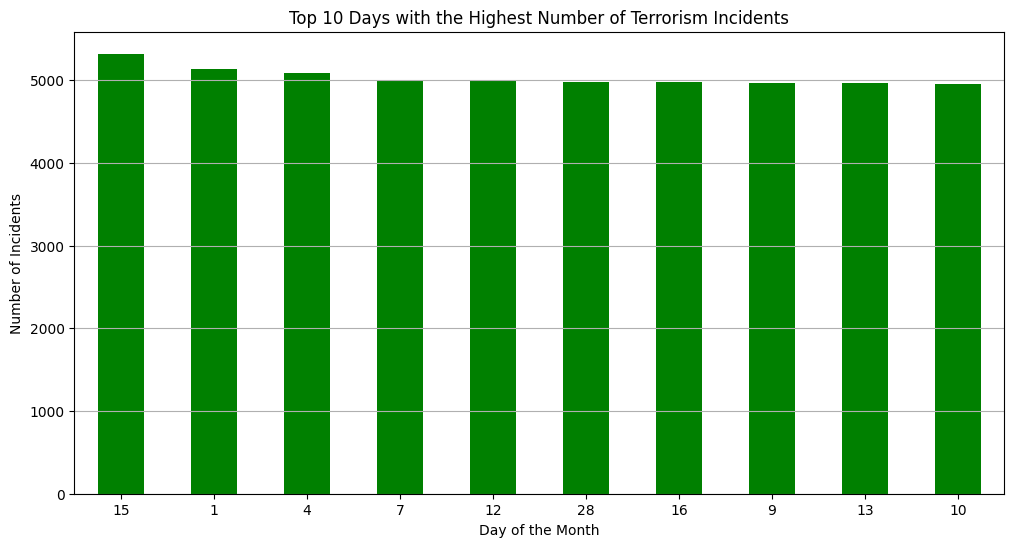

In [21]:
# Look for specific days with highest incidents.

# Convert 'iday' to numeric values
terrsm_data['iday'] = pd.to_numeric(terrsm_data['iday'], errors='coerce')

# Filter out 'iday' values that are outside the range of 1 to 31 and exclude the 0s
filtered_iday = terrsm_data['iday'].loc[(terrsm_data['iday'] >= 1) & (terrsm_data['iday'] <= 31)]

# Count the occurrences of each 'iday' value
iday_counts = filtered_iday.value_counts().sort_index()

# Get the top 10 days with the highest number of incidents
top_10_days = iday_counts.nlargest(10)

# Plotting
plt.figure(figsize=(12, 6))
top_10_days.plot(kind='bar', color='green')
plt.title('Top 10 Days with the Highest Number of Terrorism Incidents')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

The bar chart shows the top 10 days with the highest number of terrorism incidents. Each bar represents a day of the month, and the height of the bar indicates the number of incidents that occurred on that day. The chart provides a visual representation of the distribution of terrorism incidents across different days of the month, highlighting the days with the highest activity.

## **(B) Geographical Attributes**
    (i) country_txt (Country): Identify countries with the highest number of incidents
    (ii) region_txt (Region): Understand regional patterns and hotspots
    (iii) provstate (Province/State): Drill down to more specific locations within countries
    (iv) latitude and longitude: Map the incidents for spatial analysis

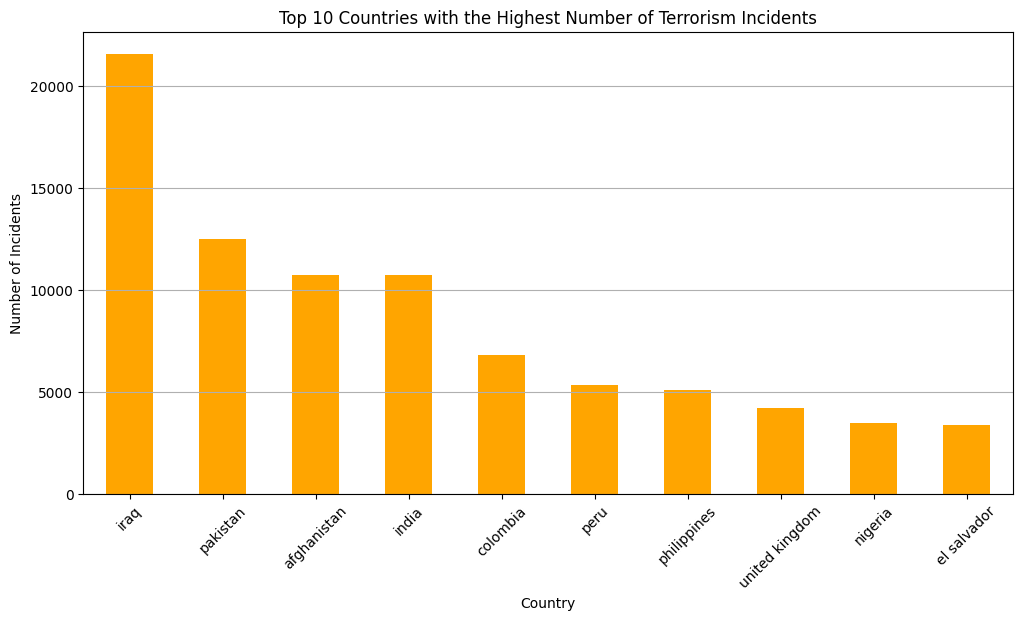

In [22]:
# Identify countries with the highest number of incidents

# Count the number of incidents per country
country_counts = terrsm_data['country_txt'].value_counts()

# Get the top 10 countries with the highest number of incidents
top_10_countries = country_counts.nlargest(10)

# Plotting
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='orange')
plt.title('Top 10 Countries with the Highest Number of Terrorism Incidents')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

The graph shows top 10 countries with highest number of Terrorism incidents. Leading is **Iraq with over 20,000** incidents and **El Salvador** at position 10 with about **3,000 incidents**.

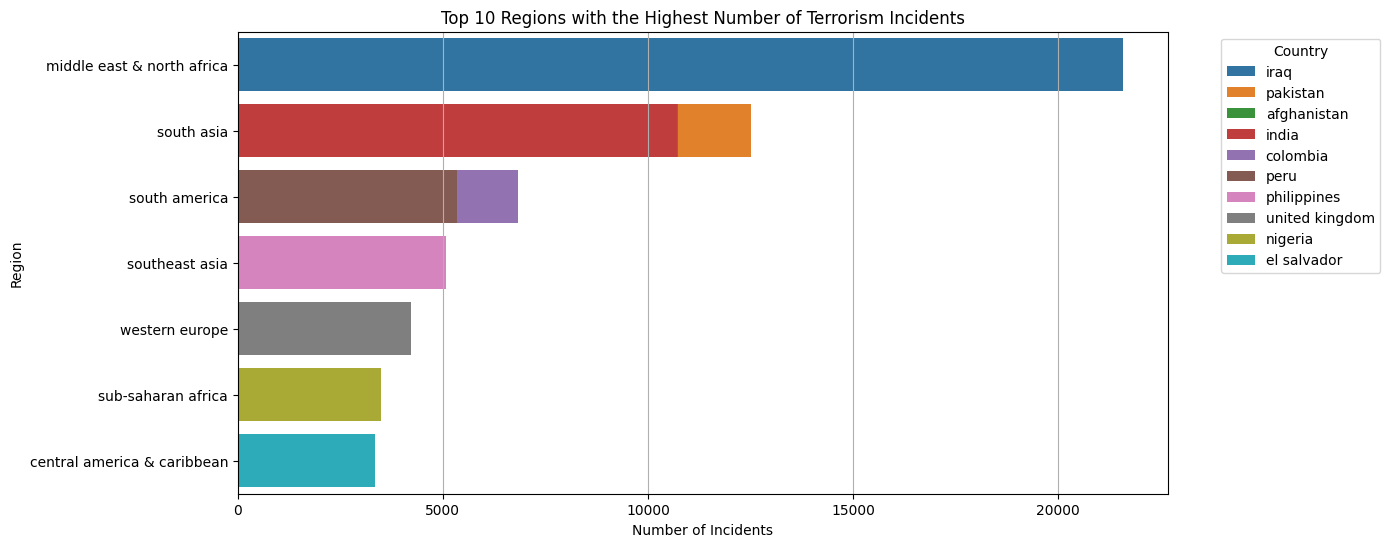

In [23]:
# Understand regional patterns and hotspots

# Group by region and country and count the number of incidents
region_country_counts = terrsm_data.groupby(['region_txt', 'country_txt']).size().reset_index(name='incident_count')

# Find the top 10 regions with the highest number of incidents
top_10_regions = region_country_counts.sort_values(by='incident_count', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_regions, x='incident_count', y='region_txt', hue='country_txt', dodge=False)
plt.title('Top 10 Regions with the Highest Number of Terrorism Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Region')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x')
plt.show()

The **Middle-East and North Africa** is the region with the highest number of Terrorism incidents and particularly in **Iraq**.

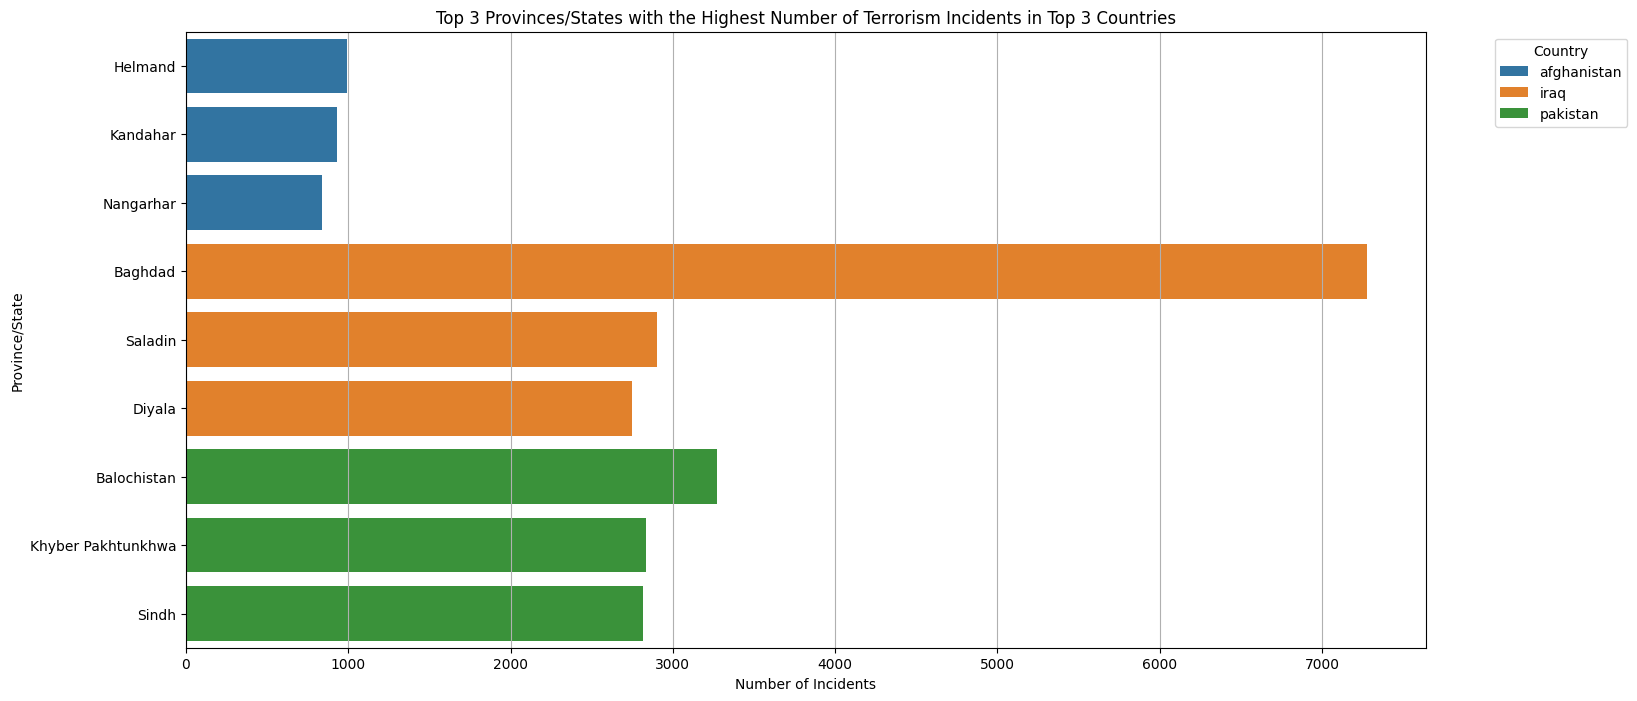

In [24]:
# Drill down to more specific locations within countries

# Group by country and count the number of incidents
country_counts = terrsm_data.groupby('country_txt').size().reset_index(name='incident_count')

# Find the top 3 countries with the highest number of incidents
top_countries = country_counts.nlargest(3, 'incident_count')['country_txt']

# Filter the original data to only include incidents from the top 3 countries
filtered_data = terrsm_data[terrsm_data['country_txt'].isin(top_countries)]

# Group by country and province/state and count the number of incidents
country_provstate_counts = filtered_data.groupby(['country_txt', 'provstate']).size().reset_index(name='incident_count')

# Find the top 3 provinces/states with the highest number of incidents in each of the top 3 countries
top_provstates_by_country = country_provstate_counts.groupby('country_txt').apply(lambda x: x.nlargest(3, 'incident_count')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(16, 8))
sns.barplot(data=top_provstates_by_country, x='incident_count', y='provstate', hue='country_txt', dodge=False)
plt.title('Top 3 Provinces/States with the Highest Number of Terrorism Incidents in Top 3 Countries')
plt.xlabel('Number of Incidents')
plt.ylabel('Province/State')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x')
plt.show()

The top three states with the highest number of terrorism incidents are **Iraq (particularly in Baghdad)**, Pakistan and Afghanistain.

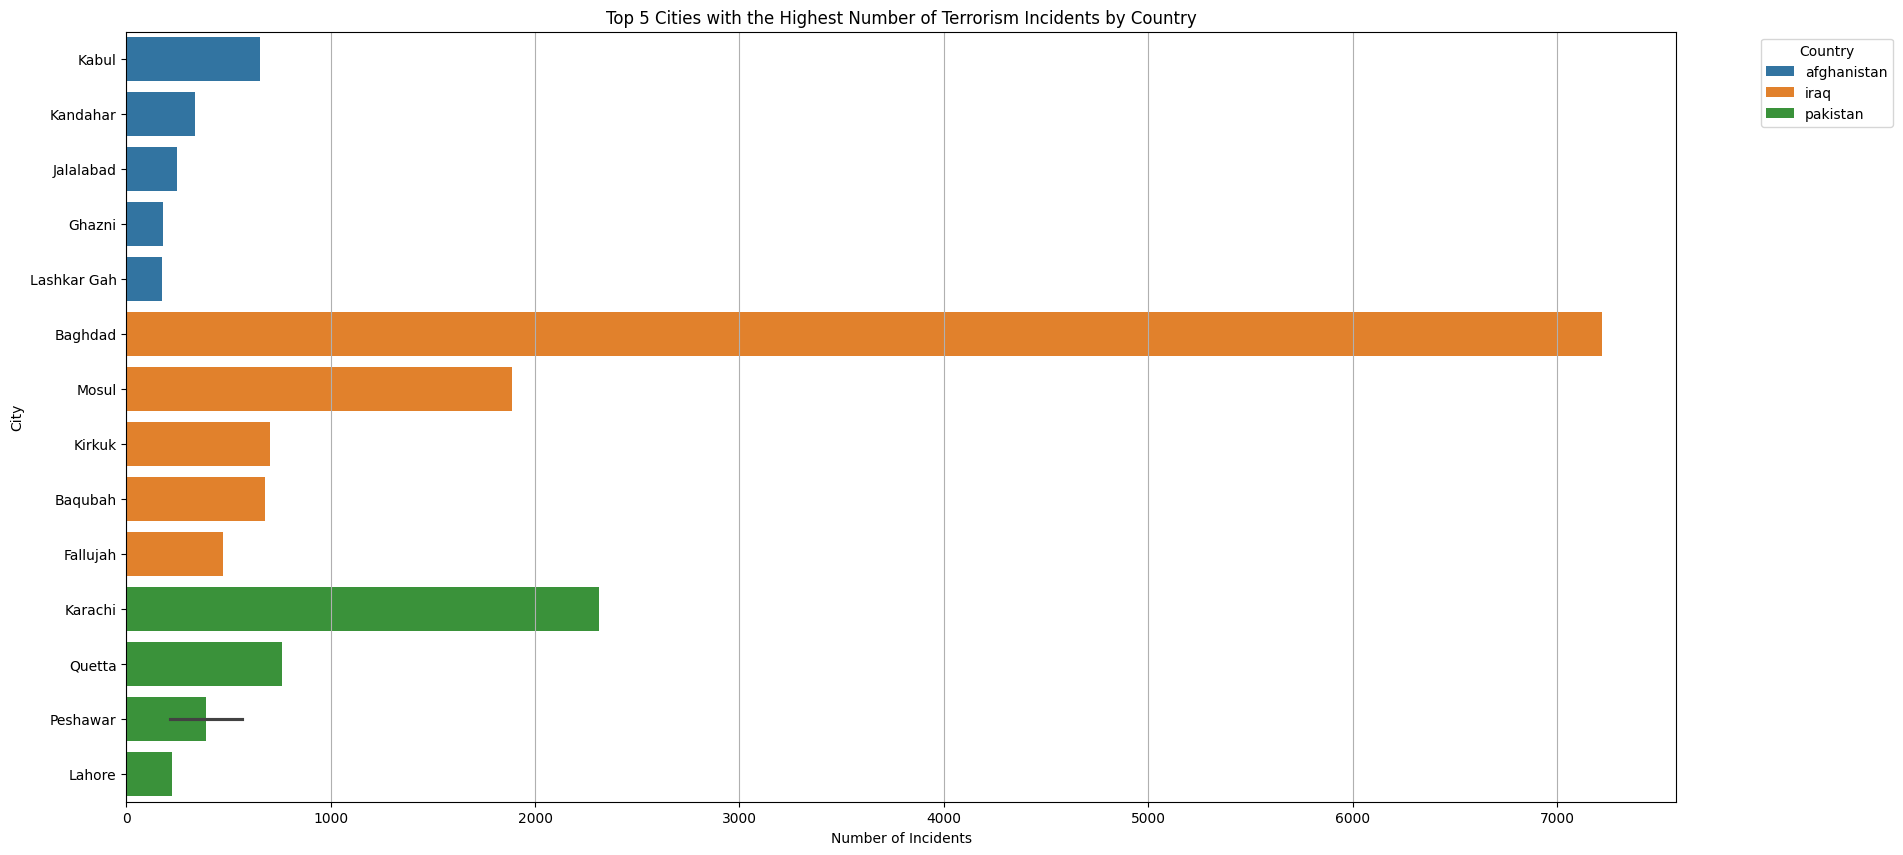

In [25]:
# Group by country and count the number of incidents
country_counts = terrsm_data.groupby('country_txt').size().reset_index(name='incident_count')

# Find the top 3 countries with the highest number of incidents
top_countries = country_counts.nlargest(3, 'incident_count')['country_txt']

# Filter the original data to only include incidents from the top 3 countries
filtered_data = terrsm_data[terrsm_data['country_txt'].isin(top_countries)]

# Group by country, province/state, and city and count the number of incidents
country_provstate_city_counts = filtered_data.groupby(['country_txt', 'provstate', 'city']).size().reset_index(name='incident_count')

# Find the top 5 cities with the highest number of incidents in each country
top_cities_by_country = country_provstate_city_counts.groupby('country_txt').apply(lambda x: x.nlargest(5, 'incident_count')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(data=top_cities_by_country, x='incident_count', y='city', hue='country_txt', dodge=False)
plt.title('Top 5 Cities with the Highest Number of Terrorism Incidents by Country')
plt.xlabel('Number of Incidents')
plt.ylabel('City')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x')
plt.show()

Three leading cities with the highest number of terrorism attacks are: **Baghdad,Karachi and Mosul**.

In [26]:
# Calculate the number of incidents per country
country_counts = terrsm_data['country_txt'].value_counts()

# Filter countries with a high number of incidents
high_incidence_countries = country_counts[country_counts > 1000].index.tolist()

# Filter terrsm_data to include only incidents from high incidence countries
filtered_data = terrsm_data[terrsm_data['country_txt'].isin(high_incidence_countries)]

# Sample a subset of data to avoid memory issues
sampled_data = filtered_data.sample(n=5000, random_state=1)  # Adjust sample size as needed

# Create a map centered around a specific latitude and longitude
map = folium.Map(location=[0, 0], zoom_start=2)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(map)

# Add markers for each incident in the sampled data
for index, row in sampled_data.iterrows():
    if not pd.isnull(row['latitude']) and not pd.isnull(row['longitude']) and row['city']:
        folium.Marker(
            [row['latitude'], row['longitude']],
            popup=row['city']
        ).add_to(marker_cluster)

# Display the map
map

The map shows the global distribution of terrorism incidents between years 1970 and 2017.

## **(C) Incidents Characteristics**
    (i) attacktype1_txt (Primary Attack Type): Determine the most common types of attack
    (ii) attacktype2_txt (Secondary Attack Type): Analyza the combination of attack types
    (iii) success: Evaluate the success rate of attacks
    (iv) suicide: Understand the prevalence of suicide attacks (1=Yes, 0=No)
    (v) extended: Investigate incidents lasting more than 24 hours (1=Yes, 0=No)

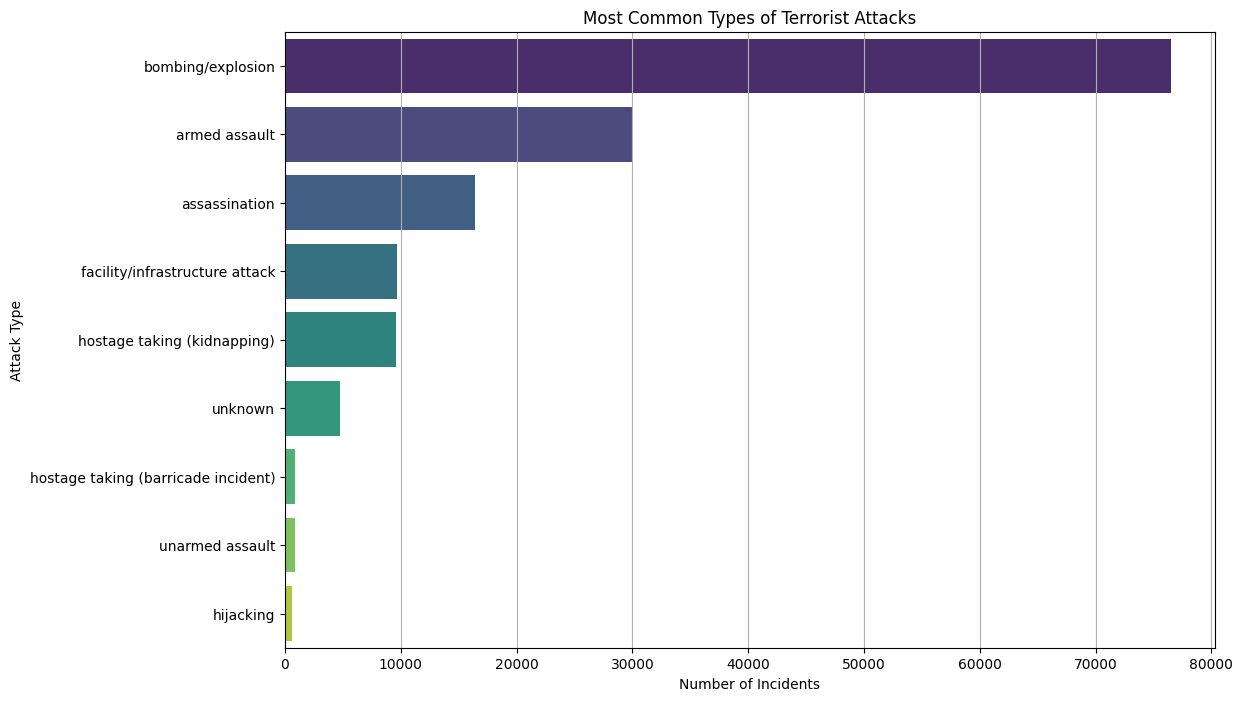

In [27]:
# Determine the most common types of attack

# Group by attack type and count the number of incidents
attack_type_counts = terrsm_data['attacktype1_txt'].value_counts().reset_index()

# Rename the columns for better readability
attack_type_counts.columns = ['Attack Type', 'Incident Count']

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=attack_type_counts, x='Incident Count', y='Attack Type', palette='viridis')
plt.title('Most Common Types of Terrorist Attacks')
plt.xlabel('Number of Incidents')
plt.ylabel('Attack Type')
plt.grid(axis='x')
plt.show()

The graph shows the visual representation of the most common types of attacks based on the "attacktype1_txt" attribute.

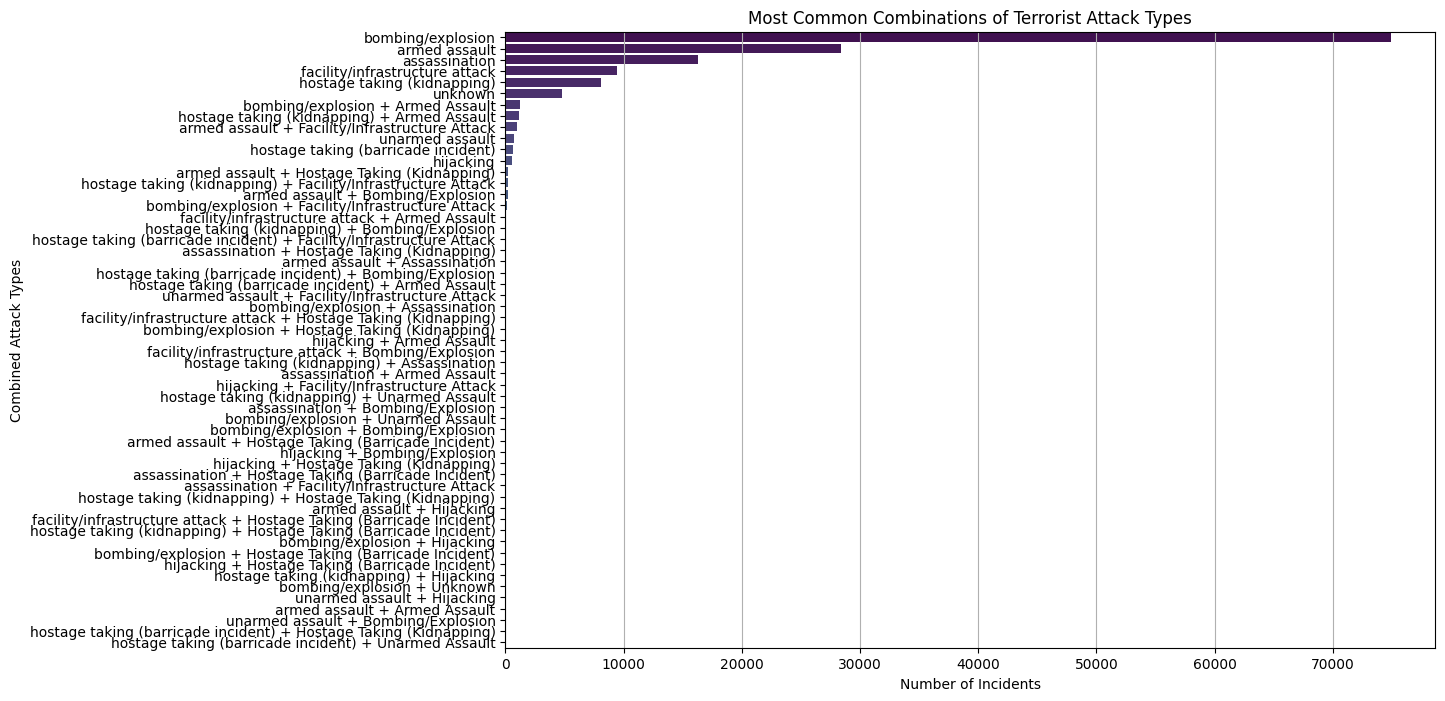

In [28]:
# Analyza the combination of attack types

# Combine primary and secondary attack types into a single column
terrsm_data['combined_attack_types'] = terrsm_data.apply(
    lambda row: f"{row['attacktype1_txt']} + {row['attacktype2_txt']}" if pd.notna(row['attacktype2_txt']) else row['attacktype1_txt'],
    axis=1
)

# Group by combined attack types and count the number of incidents
combined_attack_type_counts = terrsm_data['combined_attack_types'].value_counts().reset_index()

# Rename the columns for better readability
combined_attack_type_counts.columns = ['Combined Attack Types', 'Incident Count']

# Filter out rows with "None" in the combination
combined_attack_type_counts = combined_attack_type_counts[~combined_attack_type_counts['Combined Attack Types'].str.contains('None')]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=combined_attack_type_counts, x='Incident Count', y='Combined Attack Types', palette='viridis')
plt.title('Most Common Combinations of Terrorist Attack Types')
plt.xlabel('Number of Incidents')
plt.ylabel('Combined Attack Types')
plt.grid(axis='x')
plt.show()

The graph shows that the most common **4 combinations** of terrorism attack are: **bombing/explosion, armed assault, facility/infrustracture attack and hostage taking (kidnapping)**.

Total attacks: 149283
Successful attacks: 132144
Success rate: 88.52%


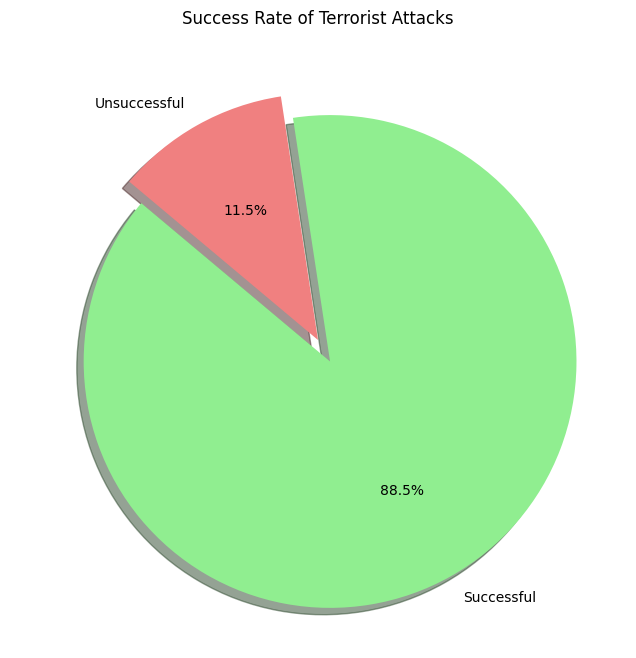

In [29]:
# Evaluate the success rate of attacks

# Calculate the total number of attacks
total_attacks = terrsm_data['success'].count()

# Calculate the number of successful attacks
successful_attacks = terrsm_data['success'].sum()

# Calculate the success rate
success_rate = successful_attacks / total_attacks

# Print the results
print(f"Total attacks: {total_attacks}")
print(f"Successful attacks: {successful_attacks}")
print(f"Success rate: {success_rate:.2%}")

# Plotting
labels = ['Successful', 'Unsuccessful']
sizes = [successful_attacks, total_attacks - successful_attacks]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Success Rate of Terrorist Attacks')
plt.show()

The above graphs shows a visual representation of the proportion of successful vs. unsuccessful attacks. With ***successful*** rate standing at **88.5%**.

Total attacks: 149283
Suicide attacks: 5328
Prevalence rate: 3.57%


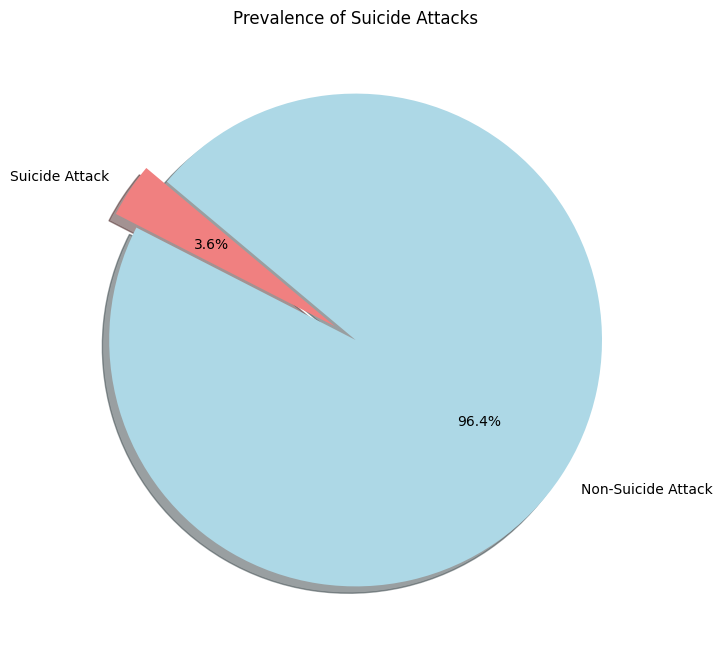

In [30]:
# Understand the prevalence of suicide attacks (1=Yes, 0=No)

# Calculate the total number of attacks
total_attacks = terrsm_data['suicide'].count()

# Calculate the number of suicide attacks
suicide_attacks = terrsm_data['suicide'].sum()

# Calculate the prevalence rate
prevalence_rate = suicide_attacks / total_attacks

# Print the results
print(f"Total attacks: {total_attacks}")
print(f"Suicide attacks: {suicide_attacks}")
print(f"Prevalence rate: {prevalence_rate:.2%}")

# Plotting
labels = ['Suicide Attack', 'Non-Suicide Attack']
sizes = [suicide_attacks, total_attacks - suicide_attacks]
colors = ['lightcoral', 'lightblue']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Prevalence of Suicide Attacks')
plt.show()

The above graph shows a visual representation of the proportion of suicide vs. non-suicide attacks with **Non-suicide attacks being the highest at 96.4%.**

Total incidents: 149283
Incidents lasting more than 24 hours: 7096
Proportion of extended incidents: 4.75%


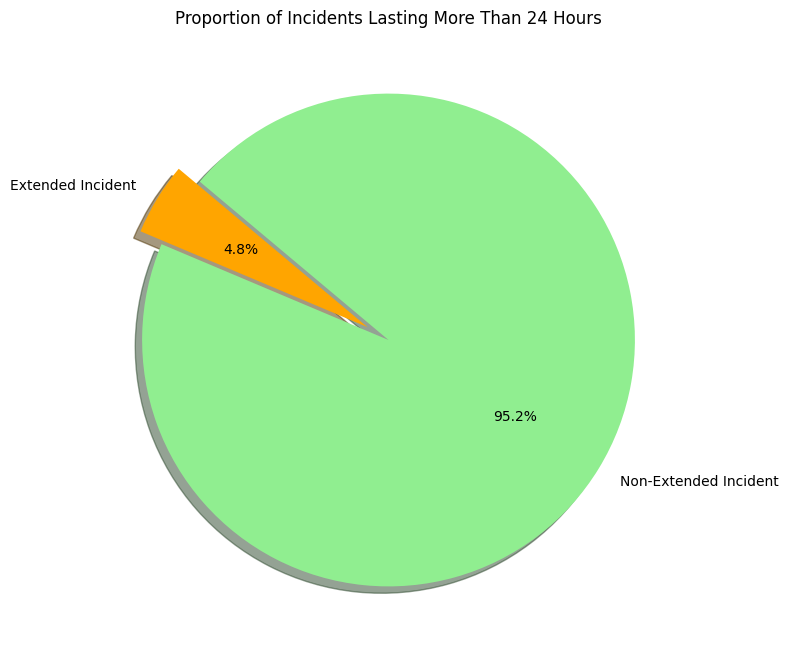

In [31]:
# Investigate incidents lasting more than 24 hours (1=Yes, 0=No)

# Calculate the total number of incidents
total_incidents = terrsm_data['extended'].count()

# Calculate the number of incidents lasting more than 24 hours
extended_incidents = terrsm_data['extended'].sum()

# Calculate the proportion of incidents lasting more than 24 hours
proportion_extended = extended_incidents / total_incidents

# Print the results
print(f"Total incidents: {total_incidents}")
print(f"Incidents lasting more than 24 hours: {extended_incidents}")
print(f"Proportion of extended incidents: {proportion_extended:.2%}")

# Plotting
labels = ['Extended Incident', 'Non-Extended Incident']
sizes = [extended_incidents, total_incidents - extended_incidents]
colors = ['orange', 'lightgreen']
explode = (0.1, 0)  # explode the 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Incidents Lasting More Than 24 Hours')
plt.show()

The above code provides us with the proportion of incidents lasting more than 24 hours and a visual representation of the proportion of extended vs. non-extended incidents. The **Non-extended icidents are at 95.2%.**

## **(D) Target and Victim Information**
    (i) targtype1_txt (Primary Target Type): Identify common target of attacks.
    (ii) corp1 (Target Entity): Details of specific target entities.
    (iii)nkill (Number of Fatalities): Analyse the human cost of terrorism.
    (iv) nwound (Number of injuries): Assess the impact of victims.
    (v) nhostkid (Number of Hostages/Kidnapping Victims): Examine incidents involving hostages.

Top Target Types:
                   Target Type  Number of Incidents
0  private citizens & property                40345
1                       police                23650
2         government (general)                20257
3                     business                19760
4               transportation                 6484


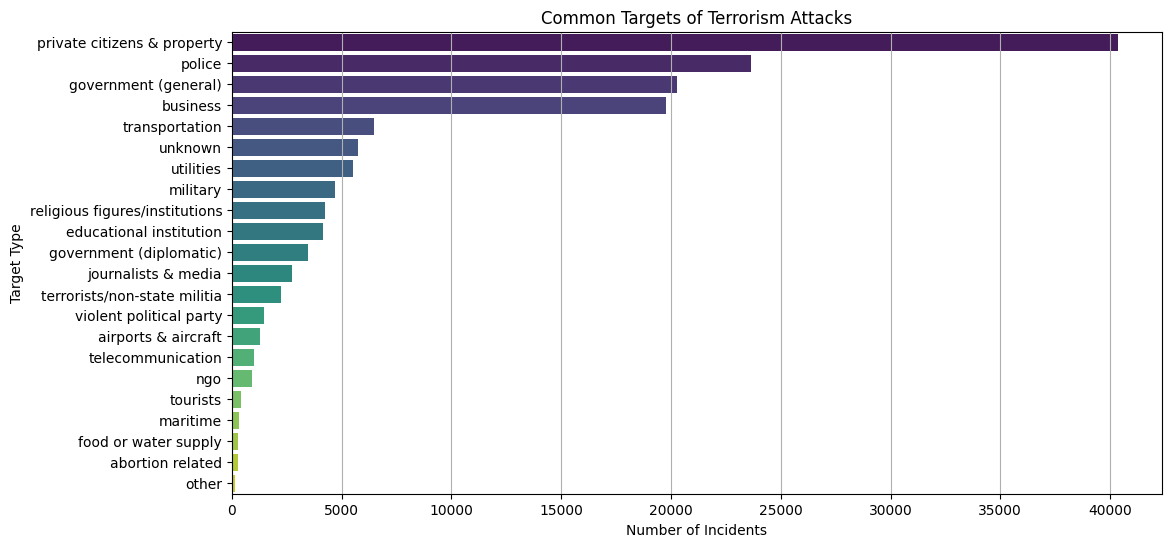

In [32]:
# Identify common target of attacks.

# Group by target type and count the number of incidents
target_counts = terrsm_data['targtype1_txt'].value_counts().reset_index()
target_counts.columns = ['Target Type', 'Number of Incidents']

# Print the top target types
print("Top Target Types:")
print(target_counts.head())

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=target_counts, x='Number of Incidents', y='Target Type', palette='viridis')
plt.title('Common Targets of Terrorism Attacks')
plt.xlabel('Number of Incidents')
plt.ylabel('Target Type')
plt.grid(axis='x')
plt.show()

List of common targets of terrorism attacks and a visual representation of the number of incidents for each target type. The 5 leading incidents and their numbers are shown here:
  - 1  private citizens & property                40345
  - 2                       police                23650
  - 3         government (general)                20257
  - 4                     business                19760
  - 5               transportation                 6484

Top Target Entities:
                Target Entity  Number of Incidents
0  Iraqi Police Service (IPS)                 3235
1                        Govt                 2484
2                      Police                 2455
3                   Civilians                 2372
4               Afghan Police                 2165
5            Pakistani Police                 1084
6                         Unk                  973
7                  Government                  894
8               Sahwa Council                  629
9                        govt                  628


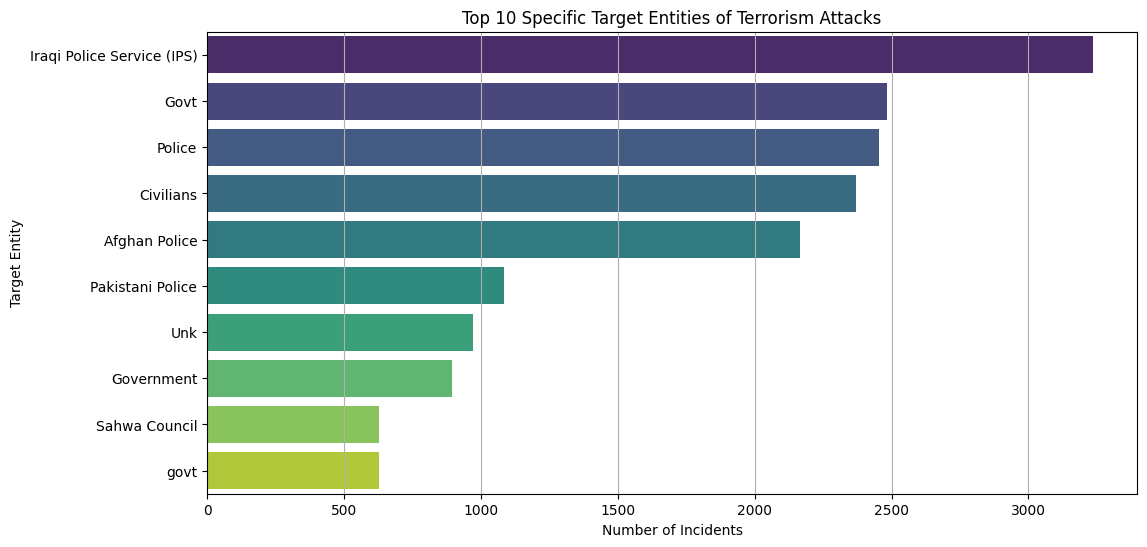

In [33]:
# Details of specific target entities.

# Filter out "Unknown" and "Not Applicable" target entities
filtered_terrsm_data = terrsm_data[~terrsm_data['corp1'].isin(["Unknown", "Not Applicable"])]

# Group by target entity and count the number of incidents
entity_counts = filtered_terrsm_data['corp1'].value_counts().reset_index()
entity_counts.columns = ['Target Entity', 'Number of Incidents']

# Print the top target entities
print("Top Target Entities:")
print(entity_counts.head(10))  # Display only the top 10 entities

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=entity_counts.head(10), x='Number of Incidents', y='Target Entity', palette='viridis')
plt.title('Top 10 Specific Target Entities of Terrorism Attacks')
plt.xlabel('Number of Incidents')
plt.ylabel('Target Entity')
plt.grid(axis='x')
plt.show()

List of specific target entities of terrorism attacks and a visual representation of the number of incidents for each target entity. This helps in identifying which entities are most frequently targeted. From the graph we see that the 5 leading target entities are:
**Iraqi Police Service(IPS), Govt, Police, Civilians and Afghan Police.**   

Total number of fatalities: 299618.0

Descriptive statistics of fatalities:
count    141689.000000
mean          2.114617
std          10.401229
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        1384.000000
Name: nkill, dtype: float64


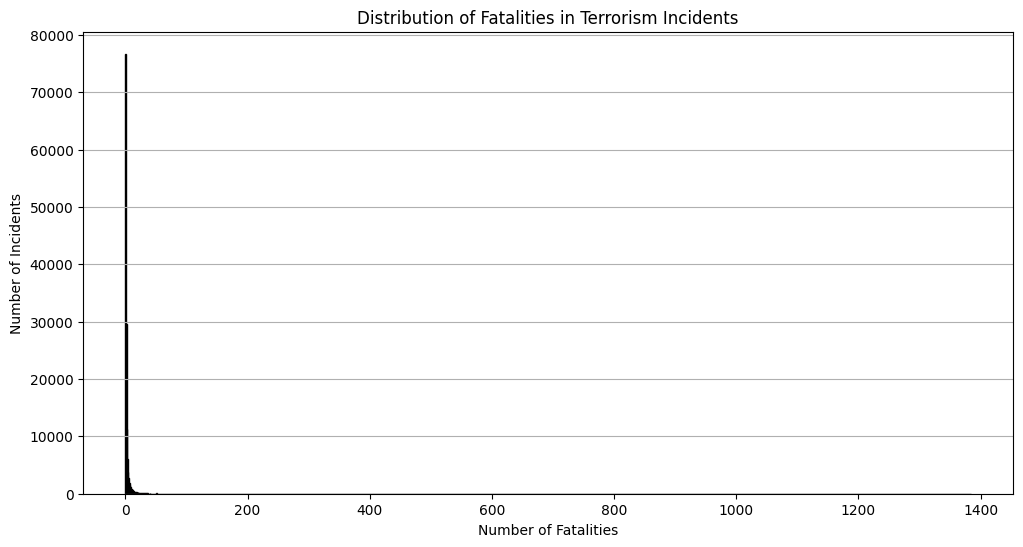


Top 10 incidents with the highest number of fatalities:


iyear imonth iday                       country_txt              city  \
73126   2001     09   11                     united states     New York City   
73127   2001     09   11                     united states     New York City   
136283  2014     08   03                              iraq            Sinjar   
133225  2014     06   10                              iraq            Badush   
179671  2017     10   14                           somalia         Mogadishu   
76347   2004     03   21                             nepal  Dhading district   
170198  2016     12   10                             syria           Palmyra   
6629    1978     08   19                              iran            Abadan   
90401   2009     01   17  democratic republic of the congo              Tora   
136561  2014     08   15                              iraq              Kojo   

         nkill  
73126   1384.0  
73127   1383.0  
136283   953.0  
133225   670.0  
179671   588.0  
76347    518.0  
170198   433.0  
6629     422.0  
90401    400.0  
136561   400.0

In [34]:
# Analyse the human cost of terrorism.

# Filter out rows where 'nkill' is NaN
terrsm_data_filtered = terrsm_data.dropna(subset=['nkill'])

# Calculate total number of fatalities
total_fatalities = terrsm_data_filtered['nkill'].sum()
print(f"Total number of fatalities: {total_fatalities}")

# Get descriptive statistics
fatalities_description = terrsm_data_filtered['nkill'].describe()
print("\nDescriptive statistics of fatalities:")
print(fatalities_description)

# Plotting the distribution of fatalities
plt.figure(figsize=(12, 6))
plt.hist(terrsm_data_filtered['nkill'], bins=range(0, int(terrsm_data_filtered['nkill'].max()) + 1, 1), color='red', edgecolor='black')
plt.title('Distribution of Fatalities in Terrorism Incidents')
plt.xlabel('Number of Fatalities')
plt.ylabel('Number of Incidents')
plt.grid(axis='y')
plt.show()

# Convert 'iyear', 'imonth', and 'iday' to datetime format
terrsm_data_filtered['iyear'] = pd.to_datetime(terrsm_data_filtered['iyear'], format='%Y', errors='coerce')
terrsm_data_filtered['imonth'] = pd.to_datetime(terrsm_data_filtered['imonth'], format='%m', errors='coerce')
terrsm_data_filtered['iday'] = pd.to_datetime(terrsm_data_filtered['iday'], format='%d', errors='coerce')

# Identify incidents with the highest fatalities
top_fatalities = terrsm_data_filtered.nlargest(10, 'nkill')

# Convert date columns to strings
top_fatalities['iyear'] = top_fatalities['iyear'].dt.strftime('%Y')
top_fatalities['imonth'] = top_fatalities['imonth'].dt.strftime('%m')
top_fatalities['iday'] = top_fatalities['iday'].dt.strftime('%d')

# Display the formatted data
print("\nTop 10 incidents with the highest number of fatalities:")
top_fatalities_df = top_fatalities[['iyear', 'imonth', 'iday', 'country_txt', 'city', 'nkill']]
top_fatalities_df

The histogram, give a comprehensive view of how fatalities in terrorism incidents are distributed and the dataframe shows the Top 10 incidents with the highest number of fatalities.

Number of missing values in 'nwound': 11895
Summary statistics for 'nwound':
count    137388.000000
mean          3.312662
std          39.224948
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        8191.000000
Name: nwound, dtype: float64


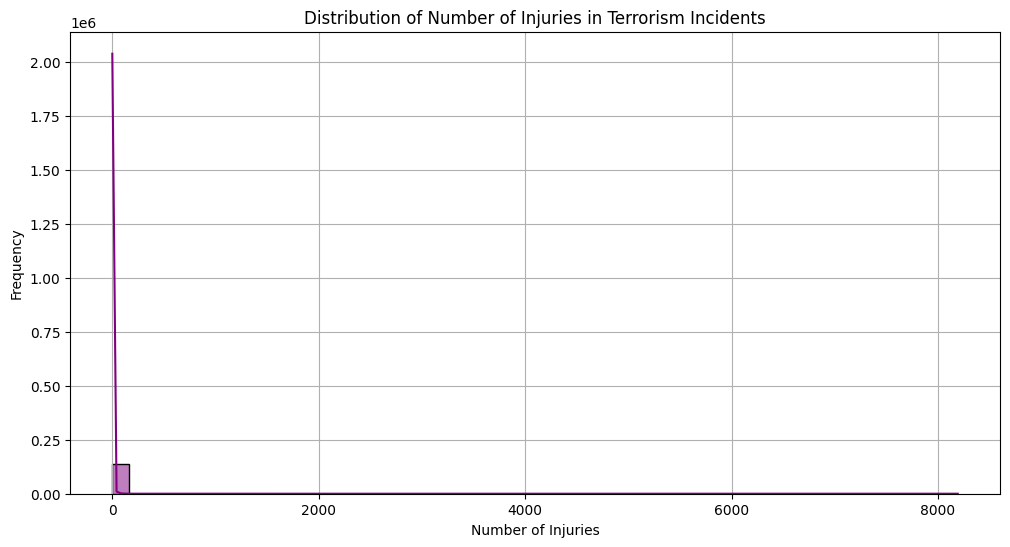

Top 10 incidents with the highest number of injuries:


country_txt           city  nwound
73127   united states  New York City  8191.0
73126   united states  New York City  8190.0
58841           japan          Tokyo  5500.0
68071           kenya        Nairobi  4000.0
159773           iraq  Taza Khurmatu  1500.0
61548       sri lanka        Colombo  1272.0
85682            chad      N'Djamena  1001.0
179344  united states      Las Vegas   851.0
81098           india         Mumbai   817.0
54147      tajikistan       Dushanbe   800.0

In [35]:
# Assess the impact of victims.

# 1. Check for missing values
missing_nwound = terrsm_data['nwound'].isnull().sum()
print(f"Number of missing values in 'nwound': {missing_nwound}")

# 2. Convert 'nwound' to numeric values (if not already)
terrsm_data['nwound'] = pd.to_numeric(terrsm_data['nwound'], errors='coerce')

# 3. Summary Statistics
nwound_summary = terrsm_data['nwound'].describe()
print("Summary statistics for 'nwound':")
print(nwound_summary)

# 4. Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(terrsm_data['nwound'].dropna(), bins=50, kde=True, color='purple')
plt.title('Distribution of Number of Injuries in Terrorism Incidents')
plt.xlabel('Number of Injuries')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 5. Top Incidents with Highest Number of Injuries
top_injury_incidents = terrsm_data[['country_txt', 'city', 'nwound']].sort_values(by='nwound', ascending=False).head(10)
print("Top 10 incidents with the highest number of injuries:")
top_injury_incidents

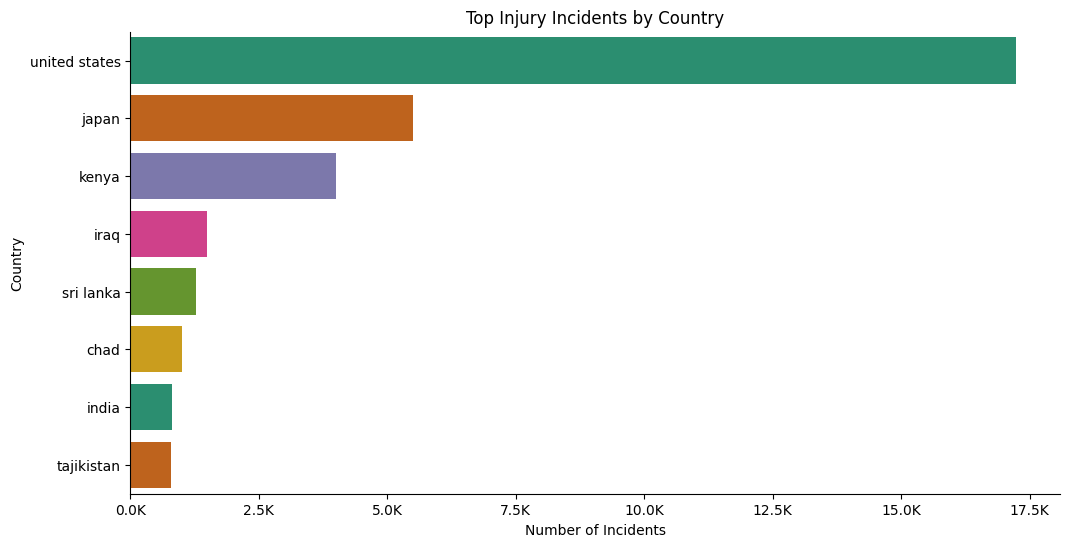

In [36]:
# Function to format the x-axis ticks in thousands
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.1fk' % (x * 1e-3)

# Sample data
data = {
    'country_txt': [
        'united states', 'united states', 'japan', 'kenya', 'iraq',
        'sri lanka', 'chad', 'united states', 'india', 'tajikistan'
    ],
    'city': [
        'New York City', 'New York City', 'Tokyo', 'Nairobi', 'Taza Khurmatu',
        'Colombo', 'N\'Djamena', 'Las Vegas', 'Mumbai', 'Dushanbe'
    ],
    'nwound': [
        8191.0, 8190.0, 5500.0, 4000.0, 1500.0,
        1272.0, 1001.0, 851.0, 817.0, 800.0
    ]
}

# Create DataFrame
top_injury_incidents = pd.DataFrame(data)

# Group by country and sum the injuries
country_injury_sums = top_injury_incidents.groupby('country_txt')['nwound'].sum().reset_index()

# Sort by the number of injuries in descending order
country_injury_sums = country_injury_sums.sort_values(by='nwound', ascending=False)

# Function to format the x-axis ticks with 'K'
def add_k(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x / 1000)

# Plotting the top injury incidents by country
plt.figure(figsize=(12, 6))
sns.barplot(data=country_injury_sums, y='country_txt', x='nwound', palette=sns.palettes.mpl_palette('Dark2'))

# Setting the titles for the heading, x-axis, and y-axis
plt.title('Top Injury Incidents by Country')
plt.xlabel('Number of Incidents')
plt.ylabel('Country')

# Format the x-axis to show values with 'K'
plt.gca().xaxis.set_major_formatter(FuncFormatter(add_k))

# Remove the top and right spines for a cleaner look
plt.gca().spines[['top', 'right']].set_visible(False)

# Display the plot
plt.show()

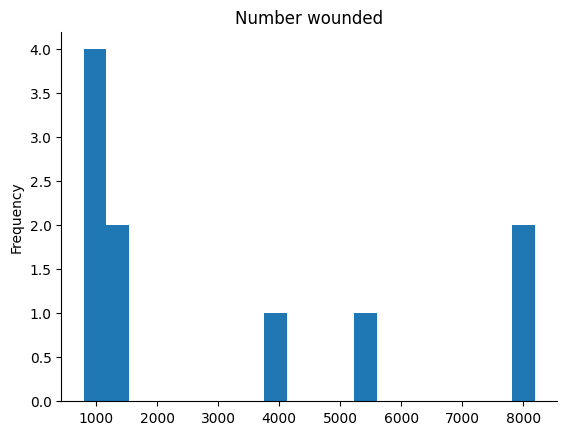

In [37]:
top_injury_incidents['nwound'].plot(kind='hist', bins=20, title='Number wounded')
plt.gca().spines[['top', 'right',]].set_visible(False)

The graph shows the distribution of injuries in terrorism attacks and a dataframe of the 10 most affected countries. With United States of **America, Japan, Kenya, Iraq and Sri Lanka** leading respectively.

Number of missing values in 'nhostkid': 137517
Summary statistics for 'nhostkid':
count    11766.000000
mean         4.554819
std        212.010538
min        -99.000000
25%          1.000000
50%          2.000000
75%          4.000000
max      17000.000000
Name: nhostkid, dtype: float64


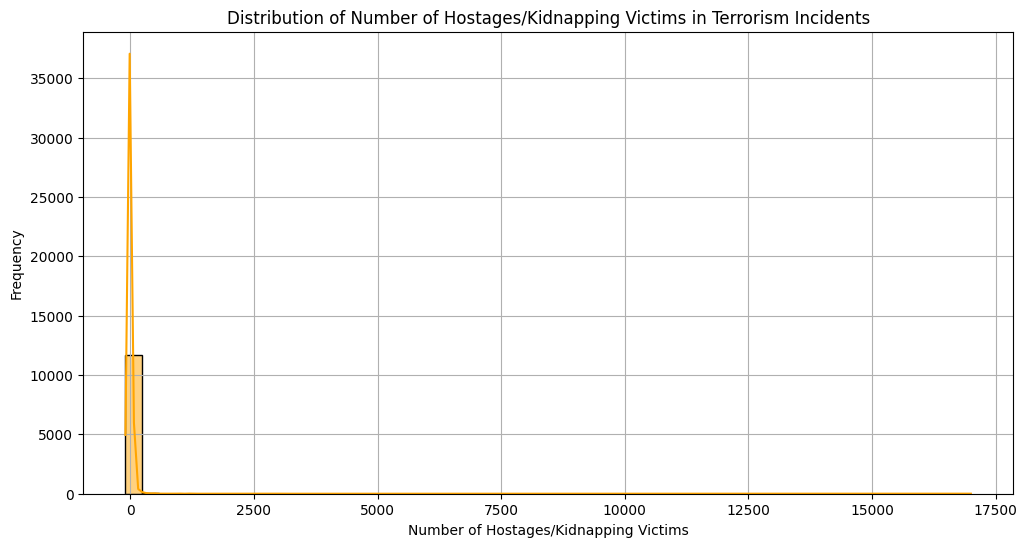

Top 10 incidents with the highest number of hostages/kidnapping victims:


country_txt                     city  nhostkid
19899   el salvador                  Jucuapa   17000.0
19898   el salvador   Nuevo Eden de San Juan   10000.0
136283         iraq                   Sinjar    5350.0
19550   el salvador                Cacaopera    5000.0
28090   el salvador  San Bartolome Perulapia    5000.0
165560         iraq         Hawijah district    3000.0
59560        russia              Budyonnovsk    2000.0
61393        russia                  Kizlyar    2000.0
91732      pakistan           Buner district    2000.0
77383         nepal          Achham district    2000.0

In [38]:
# Examine incidents involving hostages.

# 1. Check for missing values
missing_nhostkid = terrsm_data['nhostkid'].isnull().sum()
print(f"Number of missing values in 'nhostkid': {missing_nhostkid}")

# 2. Convert 'nhostkid' to numeric values (if not already)
terrsm_data['nhostkid'] = pd.to_numeric(terrsm_data['nhostkid'], errors='coerce')

# 3. Summary Statistics
nhostkid_summary = terrsm_data['nhostkid'].describe()
print("Summary statistics for 'nhostkid':")
print(nhostkid_summary)

# 4. Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(terrsm_data['nhostkid'].dropna(), bins=50, kde=True, color='orange')
plt.title('Distribution of Number of Hostages/Kidnapping Victims in Terrorism Incidents')
plt.xlabel('Number of Hostages/Kidnapping Victims')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 5. Top Incidents with Highest Number of Hostages/Kidnapping Victims
top_hostkid_incidents = terrsm_data[['country_txt', 'city', 'nhostkid']].sort_values(by='nhostkid', ascending=False).head(10)
print("Top 10 incidents with the highest number of hostages/kidnapping victims:")
top_hostkid_incidents

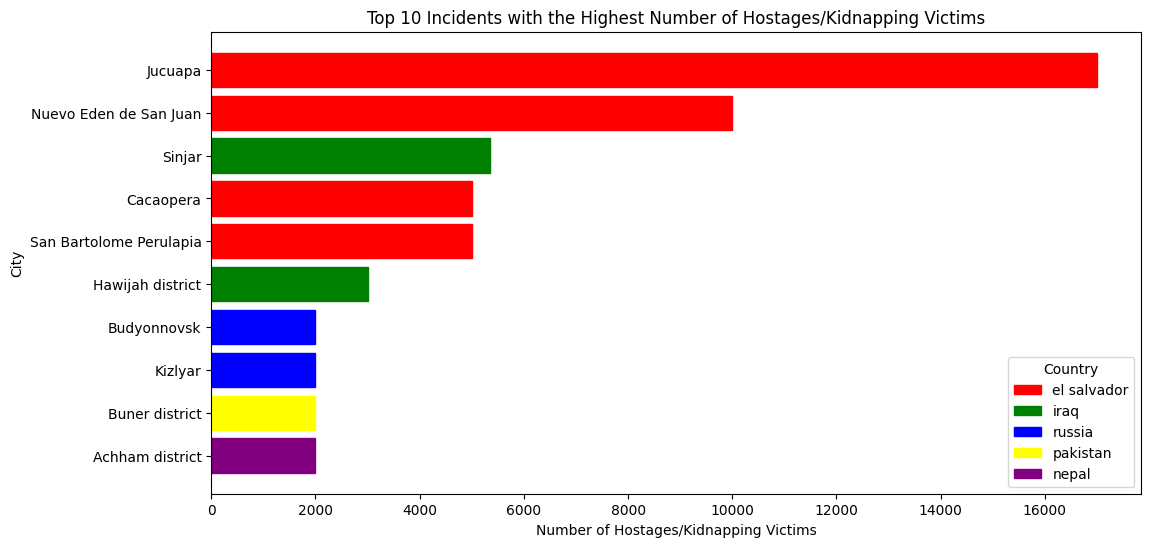

In [51]:
# Data
data = {
    'country_txt': [
        'el salvador', 'el salvador', 'iraq', 'el salvador', 'el salvador',
        'iraq', 'russia', 'russia', 'pakistan', 'nepal'
    ],
    'city': [
        'Jucuapa', 'Nuevo Eden de San Juan', 'Sinjar', 'Cacaopera',
        'San Bartolome Perulapia', 'Hawijah district', 'Budyonnovsk',
        'Kizlyar', 'Buner district', 'Achham district'
    ],
    'nhostkid': [17000.0, 10000.0, 5350.0, 5000.0, 5000.0, 3000.0, 2000.0, 2000.0, 2000.0, 2000.0]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
bars = plt.barh(df['city'], df['nhostkid'], color='skyblue')

# Adding labels and title
plt.xlabel('Number of Hostages/Kidnapping Victims')
plt.ylabel('City')
plt.title('Top 10 Incidents with the Highest Number of Hostages/Kidnapping Victims')

# Adding country labels as legend
unique_countries = df['country_txt'].unique()
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink', 'brown', 'grey', 'cyan']
color_map = {country: colors[i] for i, country in enumerate(unique_countries)}

for bar, country in zip(bars, df['country_txt']):
    bar.set_color(color_map[country])

patches = [mpatches.Patch(color=color_map[country], label=country) for country in unique_countries]
plt.legend(handles=patches, title='Country')

# Invert y-axis to have the highest number on top
plt.gca().invert_yaxis()

# Display the plot
plt.show()

Most hostages/kidnapping took place in **El Salvador, Iraq, Russia, Pakistan and Nepal**.

## **(E) Perpetrator Information**
    (i) gname (Perpetrator Group): Identify groups responsible for the most incidents.
    (ii) individual: Look into incidents carried out by individuals. (1=Yes, 0=No)
    (iii) nperps (Number of Perpertrators): Analyze group size involved in incidents.

Number of missing values in 'gname': 0


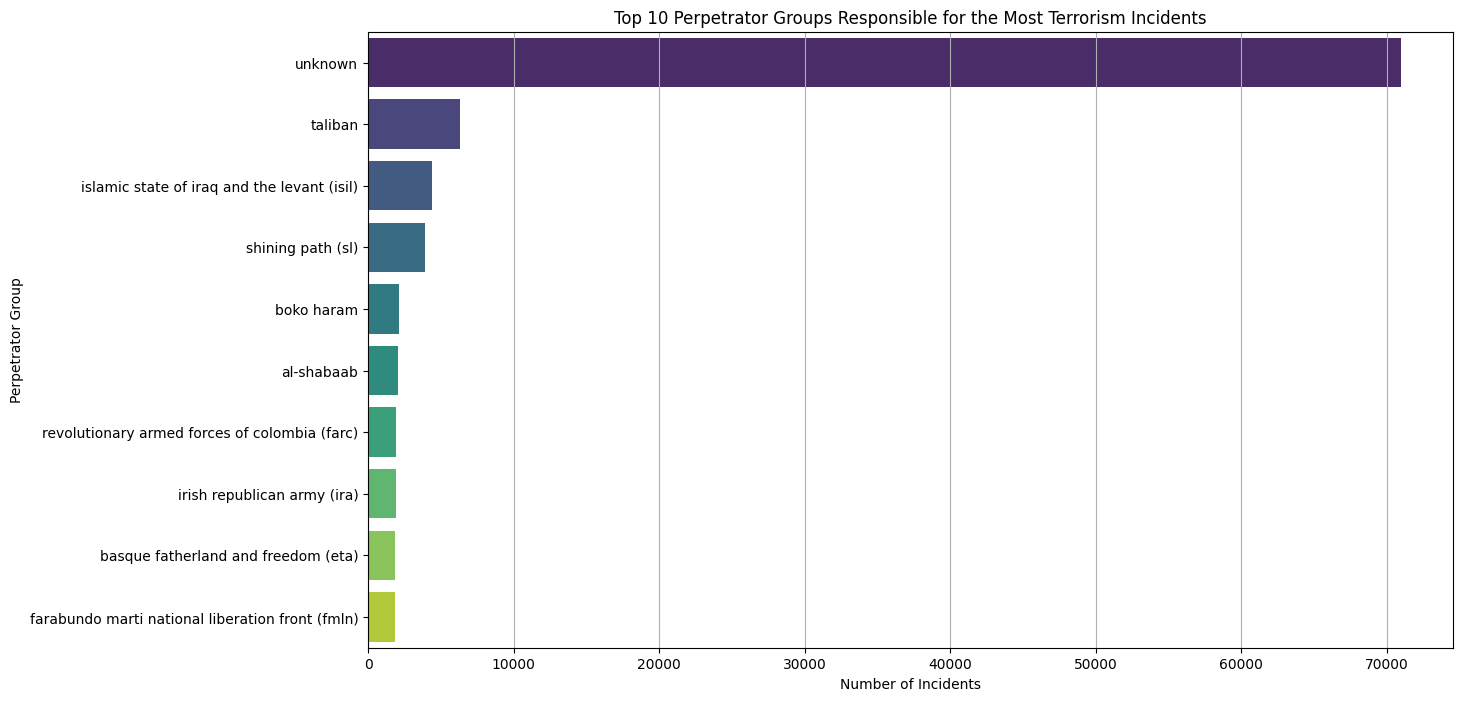

In [40]:
# Identify groups responsible for the most incidents.

# 1. Check for missing values
missing_gname = terrsm_data['gname'].isnull().sum()
print(f"Number of missing values in 'gname': {missing_gname}")

# 2. Count Incidents by Group
group_counts = terrsm_data['gname'].value_counts().reset_index()
group_counts.columns = ['gname', 'incident_count']

# 3. Identify Top Groups (e.g., top 10 groups)
top_groups = group_counts.head(10)

# 4. Visualize the Data
plt.figure(figsize=(14, 8))
sns.barplot(data=top_groups, x='incident_count', y='gname', palette='viridis')
plt.title('Top 10 Perpetrator Groups Responsible for the Most Terrorism Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Perpetrator Group')
plt.grid(axis='x')
plt.show()

Most incidents were carried out by **unknown perpetrators** followed by the **Taliban, ISIL, Shining Path, Boko Haram and Al-shabaab** respectively.

Number of missing values in 'individual': 0


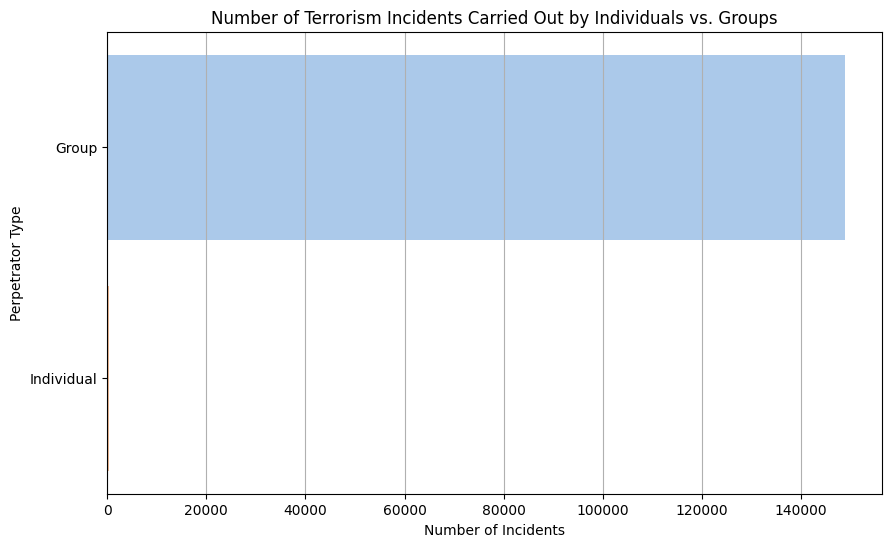

In [41]:
# Look into incidents carried out by individuals. (1=Yes, 0=No)

# 1. Check for missing values
missing_individual = terrsm_data['individual'].isnull().sum()
print(f"Number of missing values in 'individual': {missing_individual}")

# 2. Count Incidents by Individuals
individual_counts = terrsm_data['individual'].value_counts().reset_index()
individual_counts.columns = ['individual', 'incident_count']

# 3. Label the data for better readability
individual_counts['individual_label'] = individual_counts['individual'].map({1: 'Individual', 0: 'Group'})

# 4. Visualize the Data
plt.figure(figsize=(10, 6))
sns.barplot(data=individual_counts, x='incident_count', y='individual_label', palette='pastel')
plt.title('Number of Terrorism Incidents Carried Out by Individuals vs. Groups')
plt.xlabel('Number of Incidents')
plt.ylabel('Perpetrator Type')
plt.grid(axis='x')
plt.show()

Number of missing values in 'nperps': 57036
Summary Statistics for 'nperps':
count     23724.0
unique      100.0
top           1.0
freq       6867.0
Name: nperps, dtype: float64


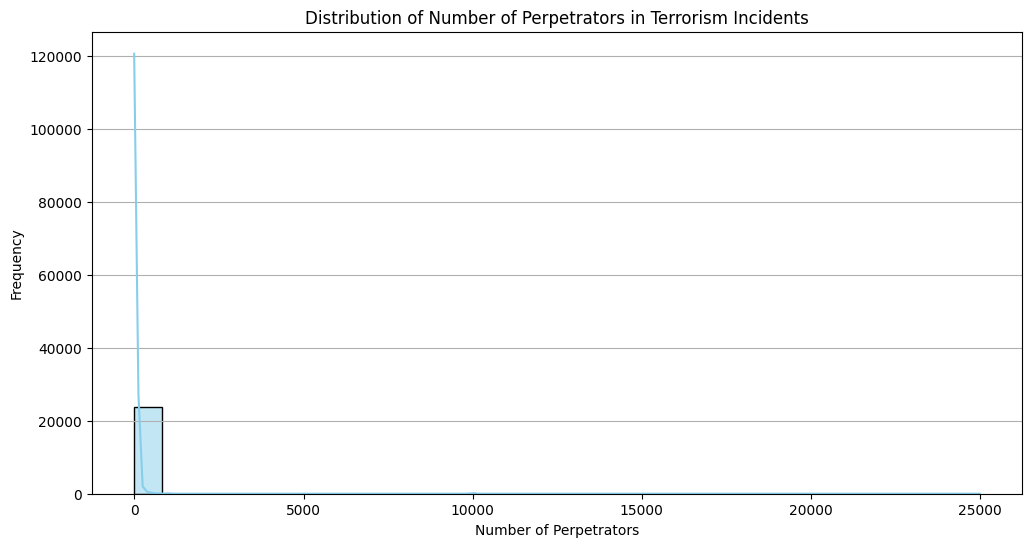

Top 10 Most Common Group Sizes in Terrorism Incidents:
nperps
1.0     6867
2.0     5240
3.0     2473
4.0     1921
5.0      921
6.0      669
10.0     550
20.0     524
30.0     486
50.0     438
Name: count, dtype: int64


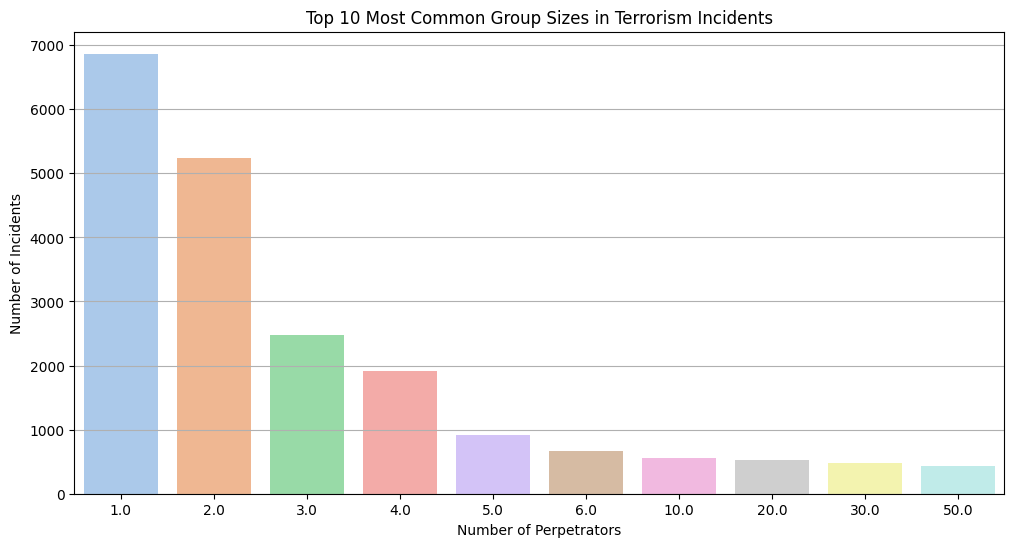

In [42]:
# Analyze group size involved in incidents.

# 1. Check for Missing Values
missing_nperps = terrsm_data['nperps'].isnull().sum()
print(f"Number of missing values in 'nperps': {missing_nperps}")

# 2. Replace -99 and -1 with NaN to denote missing data
terrsm_data['nperps'].replace([-99, -1], pd.NA, inplace=True)

# 3. Summary Statistics
nperps_stats = terrsm_data['nperps'].describe()
print("Summary Statistics for 'nperps':")
print(nperps_stats)

# 4. Distribution of Group Sizes (excluding NaN values)
plt.figure(figsize=(12, 6))
sns.histplot(terrsm_data['nperps'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Number of Perpetrators in Terrorism Incidents')
plt.xlabel('Number of Perpetrators')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# 5. Top Group Sizes (excluding NaN values)
top_nperps = terrsm_data['nperps'].dropna().value_counts().head(10)
print("Top 10 Most Common Group Sizes in Terrorism Incidents:")
print(top_nperps)

# Plotting Top Group Sizes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_nperps.index, y=top_nperps.values, palette='pastel')
plt.title('Top 10 Most Common Group Sizes in Terrorism Incidents')
plt.xlabel('Number of Perpetrators')
plt.ylabel('Number of Incidents')
plt.grid(axis='y')
plt.show()

The graph shows that incidents perpetrated by one person stood at 6867 although those **carried by groups summed to over 140,000**.

## **(F) Weapon Information**
    (i) weaptype1_txt (primary Weapon Type): Determine the most commonly used weapons.
    (ii) weapsubtype1_txt (Primary Weapon Subtype): Further detail on weaponry.

Most Commonly Used Weapons:
                                          Weapon Type  Number of Incidents
0                                          explosives                79734
1                                            firearms                43955
2                                             unknown                11567
3                                          incendiary                10281
4                                               melee                 3097
5                                            chemical                  250
6                                  sabotage equipment                  126
7                                               other                  110
8   vehicle (not to include vehicle-borne explosiv...                   94
9                                          biological                   29
10                                       fake weapons                   27
11                                       radiological                   

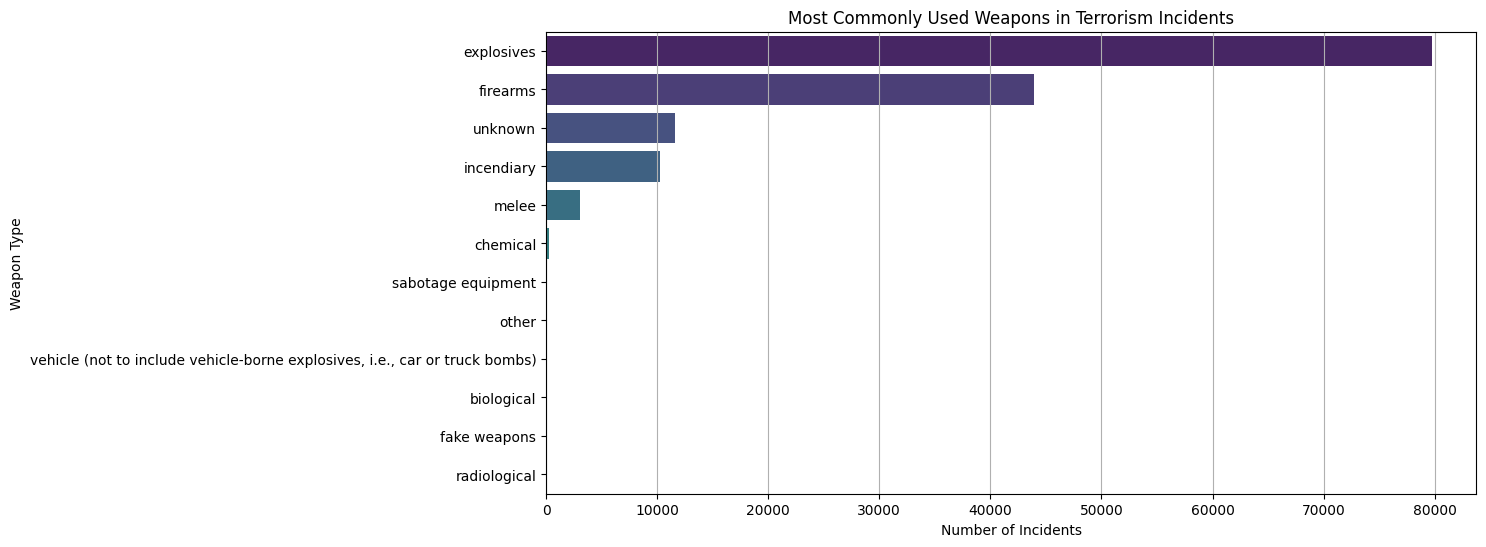

In [43]:
# Determine the most commonly used weapons.

# Group by weapon type and count the number of incidents
weapon_counts = terrsm_data['weaptype1_txt'].value_counts().reset_index()
weapon_counts.columns = ['Weapon Type', 'Number of Incidents']

# Print the top weapon types
print("Most Commonly Used Weapons:")
print(weapon_counts)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=weapon_counts, x='Number of Incidents', y='Weapon Type', palette='viridis')
plt.title('Most Commonly Used Weapons in Terrorism Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Weapon Type')
plt.grid(axis='x')
plt.show()

We get a clear insight into the most commonly used weapons in terrorism incidents based on the weaptype1_txt attribute. From the graph we see that **Explosive and Firearms** are the two mostly used weapons in Terrorism incidents.

Most Commonly Used Weapon Subtypes:
                               Weapon Subtype  Number of Incidents
0                      Unknown Explosive Type                40034
1                            Unknown Gun Type                26701
2           Automatic or Semi-Automatic Rifle                10699
3                                     Vehicle                 8472
4   Projectile (rockets, mortars, RPGs, etc.)                 7198
5                        Other Explosive Type                 6923
6                                     Handgun                 5720
7                                     Grenade                 4468
8                                  Arson/Fire                 3839
9                                    Landmine                 3030
10    Suicide (carried bodily by human being)                 2796
11                             Remote Trigger                 2158
12                Knife or Other Sharp Object                 2146
13                        

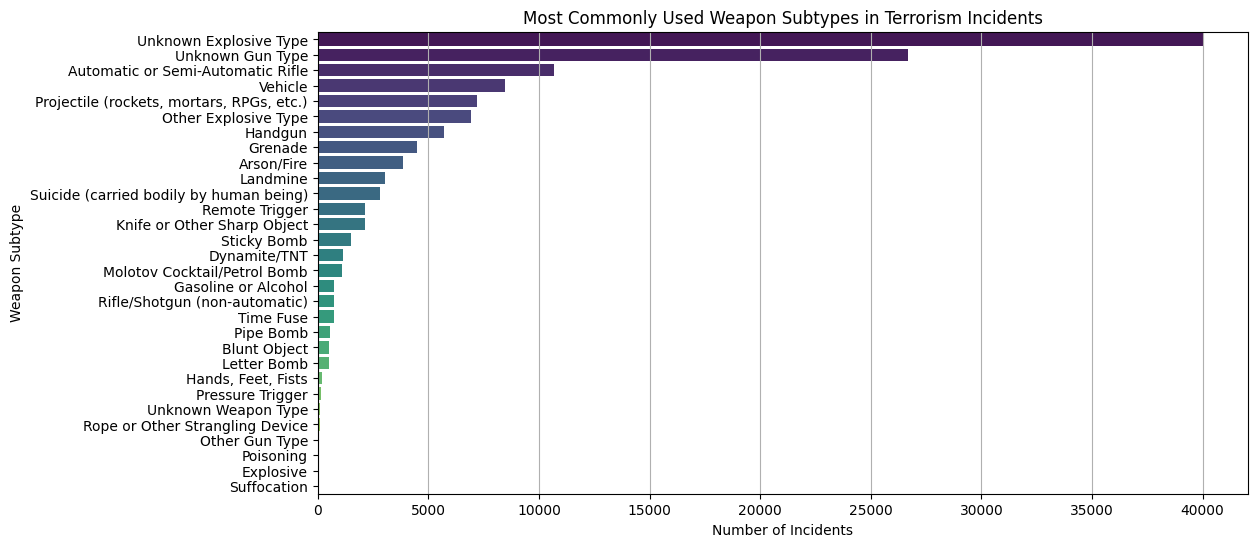

In [44]:
# Further detail on weaponry.

# Group by weapon subtype and count the number of incidents
weapon_subtype_counts = terrsm_data['weapsubtype1_txt'].value_counts().reset_index()
weapon_subtype_counts.columns = ['Weapon Subtype', 'Number of Incidents']

# Print the top weapon subtypes
print("Most Commonly Used Weapon Subtypes:")
print(weapon_subtype_counts)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=weapon_subtype_counts, x='Number of Incidents', y='Weapon Subtype', palette='viridis')
plt.title('Most Commonly Used Weapon Subtypes in Terrorism Incidents')
plt.xlabel('Number of Incidents')
plt.ylabel('Weapon Subtype')
plt.grid(axis='x')
plt.show()

A detailed view of the weapon subtypes used in terrorism incidents based on the weapsubtype1_txt attribute, providing deeper insights into the specifics of the weaponry used.
Here we see that:
1. **Unknown Explosive Type**
2. **Unknown Gun Type**
3. **Automatic or Semi-Automatic Rifle**
4. **Vehicle** and
5. **Projectile (rockets, mortars, RPGs, etc.)**
are the 5 most used weapon subtypes.

## **(G) Property and Economic Impact**
    (i) property: Incidents involving property damage.
    (ii) propvalue (Value of Property Damaged): Financial cost of incidents.

Number of incidents involving property damage: 78001
Top countries with property damage incidents:
    Country  Number of Property Damage Incidents
0      iraq                                 7646
1  pakistan                                 6224
2     india                                 4436
3      peru                                 4223
4  colombia                                 4058


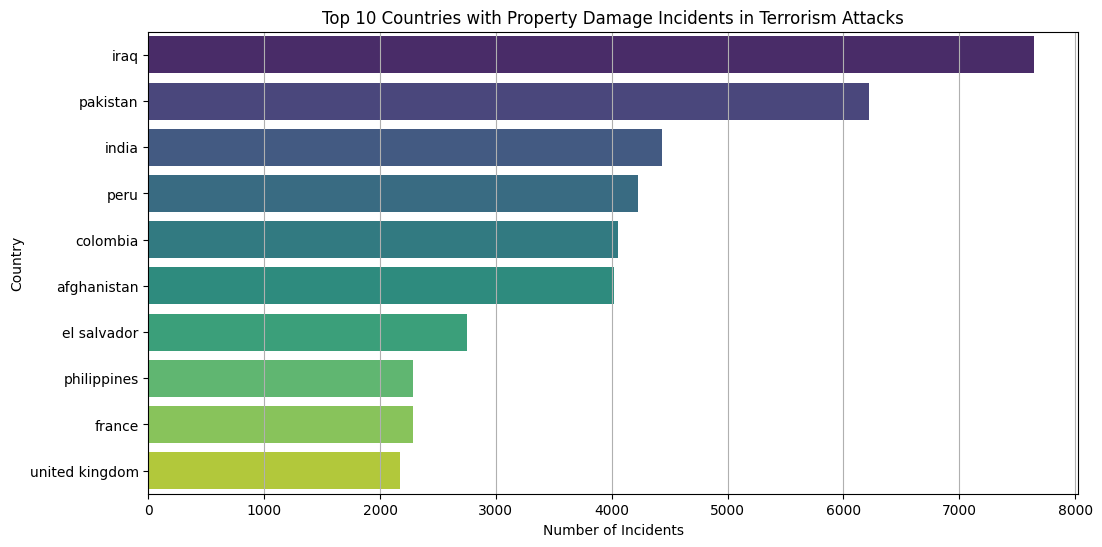

In [45]:
# Incidents involving property damage.

# Filter the data for incidents involving property damage
property_damage_incidents = terrsm_data[terrsm_data['property'] == 1]

# Count the number of incidents involving property damage
num_property_damage_incidents = property_damage_incidents.shape[0]
print(f"Number of incidents involving property damage: {num_property_damage_incidents}")

# Optional: Further analysis and visualization

# Group by country and count the number of property damage incidents per country
property_damage_by_country = property_damage_incidents['country_txt'].value_counts().reset_index()
property_damage_by_country.columns = ['Country', 'Number of Property Damage Incidents']

# Print the top countries with property damage incidents
print("Top countries with property damage incidents:")
print(property_damage_by_country.head())

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=property_damage_by_country.head(10), x='Number of Property Damage Incidents', y='Country', palette='viridis')
plt.title('Top 10 Countries with Property Damage Incidents in Terrorism Attacks')
plt.xlabel('Number of Incidents')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()

The above table and graph helps us to identify and analyze incidents involving property damage, providing insights into the geographical distribution and frequency of such incidents. Highest property damage was reported in **Iraq, Pakistan, India, Peru and Colombia** respectively.

Total financial cost of property damage: $7,862,670,768.82
Summary Statistics for Property Damage Values:
count    3.352700e+04
mean     2.345176e+05
std      1.673743e+07
min     -9.900000e+01
25%     -9.900000e+01
50%     -9.900000e+01
75%      1.000000e+03
max      2.700000e+09
Name: propvalue, dtype: float64


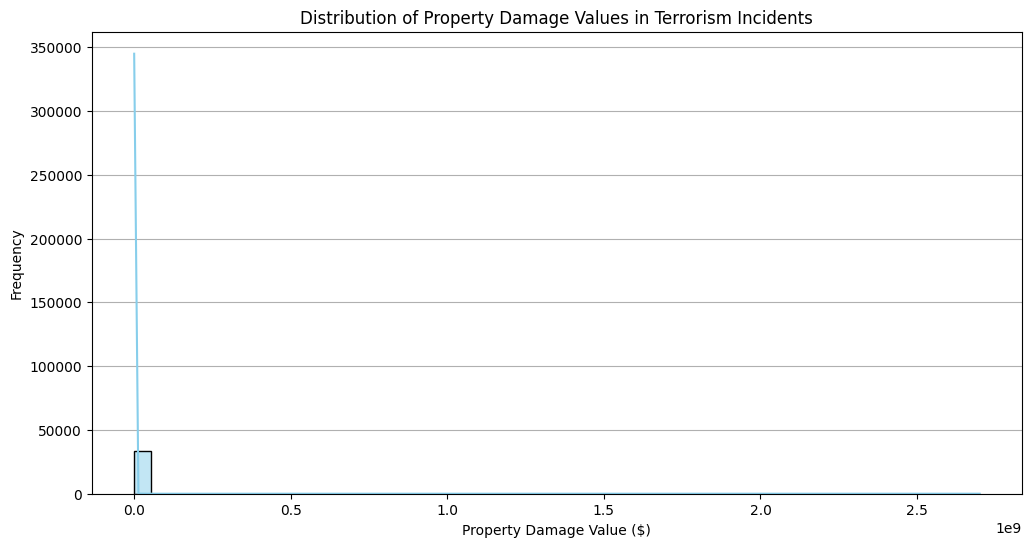

Top countries with the highest total property damage values:
            Country  Total Property Damage Value
150  united kingdom                 4.099917e+09
151   united states                 9.210106e+08
112            peru                 8.072317e+08
133       sri lanka                 3.662523e+08
29         colombia                 3.480620e+08


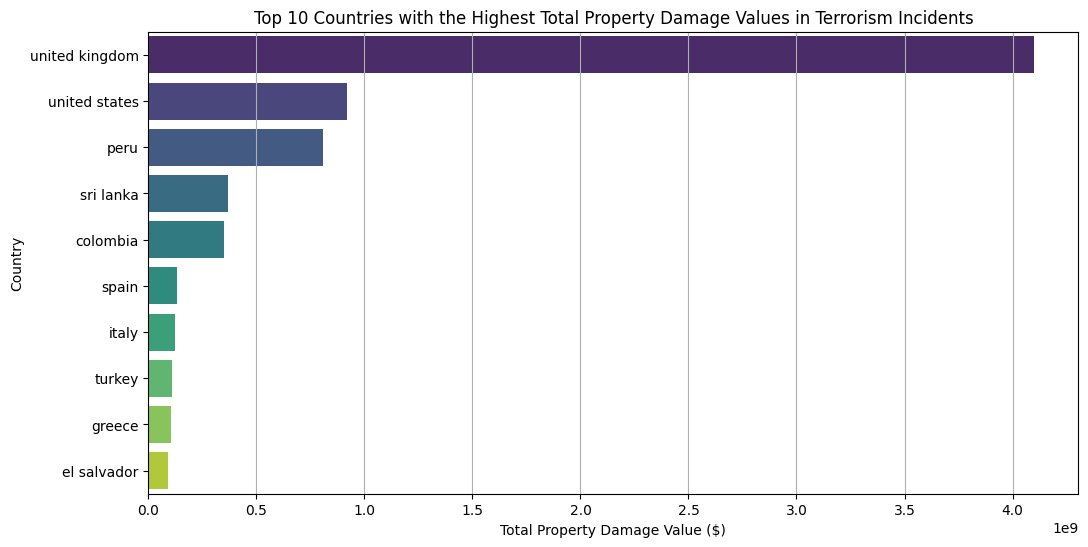

In [46]:
# Financial cost of incidents.

# Filter out incidents where property damage value is recorded
property_damage_value_incidents = terrsm_data[terrsm_data['propvalue'].notnull()]

# Calculate the total financial cost of property damage
total_property_damage_value = property_damage_value_incidents['propvalue'].sum()
print(f"Total financial cost of property damage: ${total_property_damage_value:,.2f}")

# Optional: Further analysis and visualization

# Summary statistics for property damage values
property_damage_value_stats = property_damage_value_incidents['propvalue'].describe()
print("Summary Statistics for Property Damage Values:")
print(property_damage_value_stats)

# Plotting the distribution of property damage values
plt.figure(figsize=(12, 6))
sns.histplot(property_damage_value_incidents['propvalue'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Property Damage Values in Terrorism Incidents')
plt.xlabel('Property Damage Value ($)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Group by country and sum the property damage values per country
property_damage_value_by_country = property_damage_value_incidents.groupby('country_txt')['propvalue'].sum().reset_index()
property_damage_value_by_country.columns = ['Country', 'Total Property Damage Value']

# Sort the countries by total property damage value in descending order
property_damage_value_by_country = property_damage_value_by_country.sort_values(by='Total Property Damage Value', ascending=False)

# Print the top countries with the highest total property damage values
print("Top countries with the highest total property damage values:")
print(property_damage_value_by_country.head())

# Plotting the top 10 countries with the highest total property damage values
plt.figure(figsize=(12, 6))
sns.barplot(data=property_damage_value_by_country.head(10), x='Total Property Damage Value', y='Country', palette='viridis')
plt.title('Top 10 Countries with the Highest Total Property Damage Values in Terrorism Incidents')
plt.xlabel('Total Property Damage Value ($)')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()

The 3 countries that suffered highest property damage in value($) were: **United Kingdom (over 4B dollars), United States of America (almost 1B dollars) and Peru (about 0.8B dollars)**.

## (H) Additional Context
    (i) motive: Explore the motives behind the attacks.
    (ii) claimed: Understand if incidents were claimed by groups.
    (iii) ransom: Investigate incidents involving ransom demands.

Top 10 Most Common Motives Behind Attacks:
_________________________________________ 
motive
The specific motive for the attack is unknown.                                                                                                                                                                                                          13793
Unknown                                                                                                                                                                                                                                                 12121
The specific motive is unknown; however, sources noted that the attack may have been part of a larger trend of violence related to Bangladesh's nationwide hartal, which began on January 6, 2015.                                                        294
The specific motive for the attack is unknown..                                                                                                  

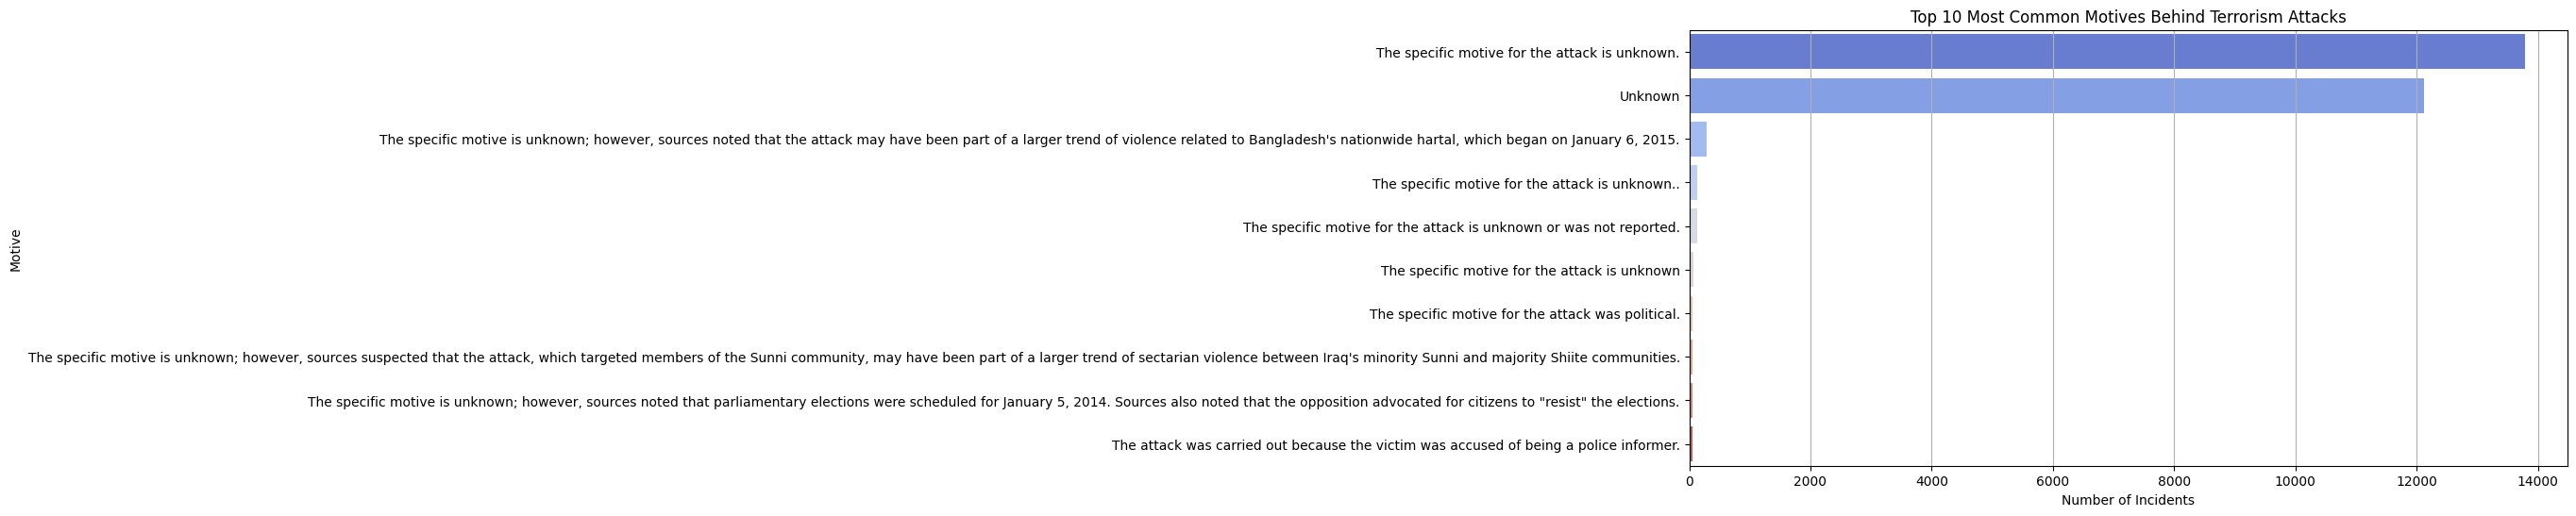

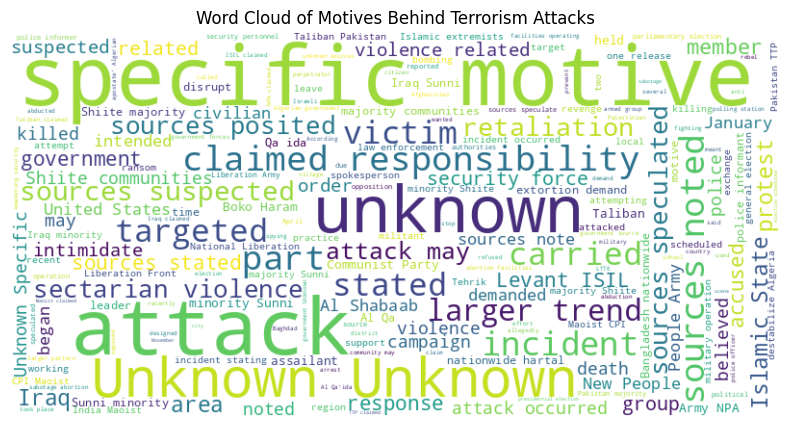

In [47]:
# Explore the motives behind the attacks.

# Filter out incidents where motive is recorded
motive_incidents = terrsm_data[terrsm_data['motive'].notnull()]

# Get the top 10 most common motives
top_motives = motive_incidents['motive'].value_counts().head(10)
print("Top 10 Most Common Motives Behind Attacks:")
print("_________________________________________ ")
print(top_motives)

# Plotting the top 10 most common motives
plt.figure(figsize=(12, 6))
sns.barplot(x=top_motives.values, y=top_motives.index, palette='coolwarm')
plt.title('Top 10 Most Common Motives Behind Terrorism Attacks')
plt.xlabel('Number of Incidents')
plt.ylabel('Motive')
plt.grid(axis='x')
plt.show()

# Word cloud for visualizing motives

# Combine all motives into a single string
all_motives = ' '.join(motive_incidents['motive'].dropna().tolist())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_motives)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Motives Behind Terrorism Attacks')
plt.show()

The above graph and word cloud helps us to explore and visualize the motives behind terrorism attacks, giving insights into the most common reasons cited for these incidents. From the word cloud, it is evident that the most pronounced motives behind terrorism attacks were those with **specific motives**, followed by sporadic **attacks** and the **unknown** reasons.

Unique values in 'claimed' attribute after filtering: [nan  0.  1.]

Number and Percentage of Claimed and Unclaimed Incidents:
   Claimed  Number of Incidents  Percentage
0      0.0                79767   84.032489
1      1.0                15157   15.967511


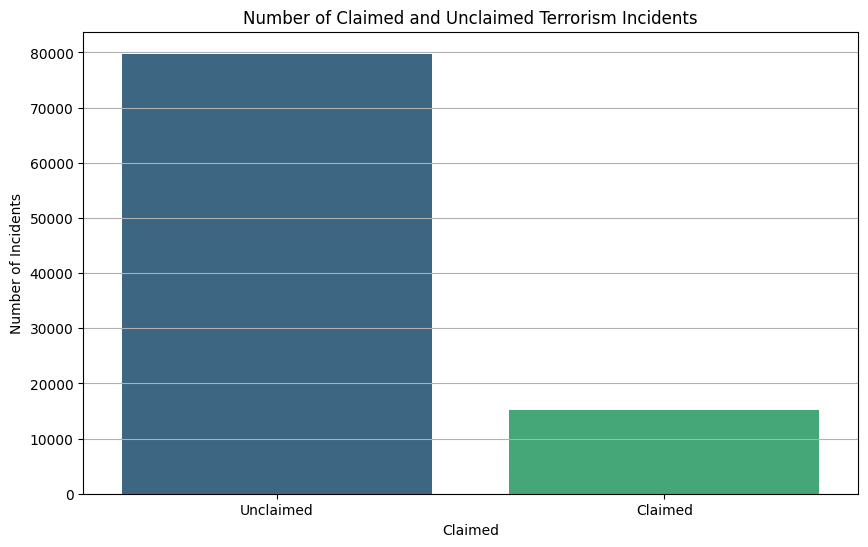

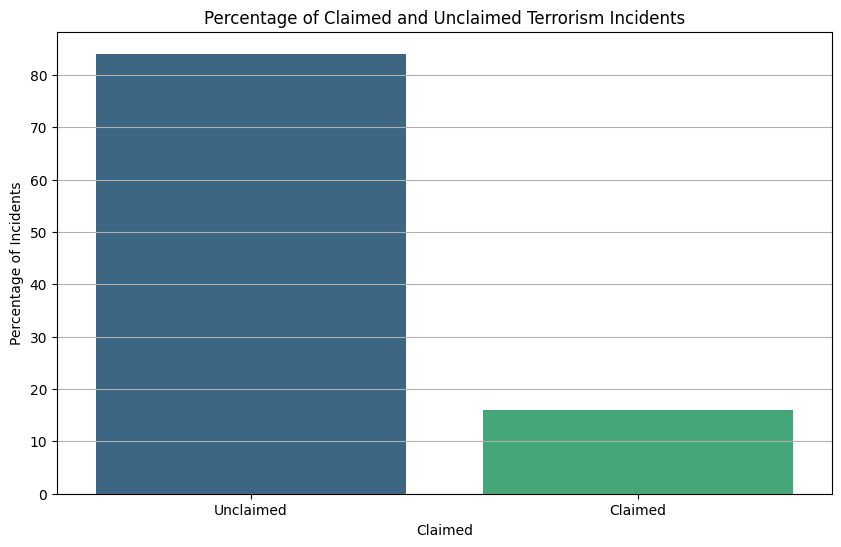

In [48]:
# Understand if incidents were claimed by groups.

# Filter out the -9 values
filtered_terrsm_data = terrsm_data[terrsm_data['claimed'] != -9]

# Check for the unique values in the 'claimed' attribute after filtering
unique_claimed_values = filtered_terrsm_data['claimed'].unique()
print(f"Unique values in 'claimed' attribute after filtering: {unique_claimed_values}")

# Count the number of claimed (1) and unclaimed (0) incidents
claimed_counts = filtered_terrsm_data['claimed'].value_counts().reset_index()
claimed_counts.columns = ['Claimed', 'Number of Incidents']

# Calculate the percentage of claimed incidents
total_incidents = claimed_counts['Number of Incidents'].sum()
claimed_counts['Percentage'] = (claimed_counts['Number of Incidents'] / total_incidents) * 100

# Print the results
print("\nNumber and Percentage of Claimed and Unclaimed Incidents:")
print(claimed_counts)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(data=claimed_counts, x='Claimed', y='Number of Incidents', palette='viridis')
plt.title('Number of Claimed and Unclaimed Terrorism Incidents')
plt.xlabel('Claimed')
plt.ylabel('Number of Incidents')
plt.xticks([0, 1], ['Unclaimed', 'Claimed'])
plt.grid(axis='y')
plt.show()

# Plotting the percentage of claimed incidents
plt.figure(figsize=(10, 6))
sns.barplot(data=claimed_counts, x='Claimed', y='Percentage', palette='viridis')
plt.title('Percentage of Claimed and Unclaimed Terrorism Incidents')
plt.xlabel('Claimed')
plt.ylabel('Percentage of Incidents')
plt.xticks([0, 1], ['Unclaimed', 'Claimed'])
plt.grid(axis='y')
plt.show()



The unclaimed incidents were about 85% with the claimed ones being 15%.

Number of incidents involving ransom demands: 1077
Percentage of incidents involving ransom demands: 0.72%


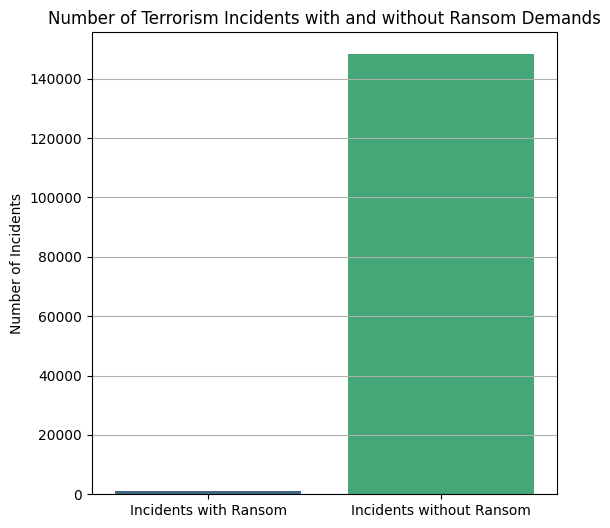

In [49]:
# Investigate incidents involving ransom demands.

# Filter the data to include only incidents where ransom was demanded (ransom=1)
ransom_incidents = terrsm_data[terrsm_data['ransom'] == 1]

# Count the number of incidents involving ransom demands
ransom_count = len(ransom_incidents)

# Calculate the total number of incidents
total_incidents = len(terrsm_data)

# Calculate the percentage of incidents involving ransom demands
percentage_ransom = (ransom_count / total_incidents) * 100

# Print the results
print(f"Number of incidents involving ransom demands: {ransom_count}")
print(f"Percentage of incidents involving ransom demands: {percentage_ransom:.2f}%")

# Plotting
plt.figure(figsize=(6, 6))
sns.barplot(x=['Incidents with Ransom', 'Incidents without Ransom'], y=[ransom_count, total_incidents - ransom_count], palette='viridis')
plt.title('Number of Terrorism Incidents with and without Ransom Demands')
plt.ylabel('Number of Incidents')
plt.grid(axis='y')
plt.show()

The above graph helps us to understand the frequency and proportion of terrorism incidents that involved ransom demands, providing insights into the nature of these incidents. It shows that most incidents were without demand for ransom.